# Identification
Please indicate your name and parcours

Student 1: Sama Satariyan

Student 2: Erisa Kohansal

# Practical works 9 & 10: Face recognition by Eigenfaces method


**The objective of this practical work is to study the properties of the Eigenfaces face recognition method.**

We propose to develop a system capable of:
- identify a face from a database of faces 
- determine whether an image contains a face present in the database
- to decide whether an image represents a face or not

Tools developed in this practical work will be applied to the Yale Faces Database.

## General principle

The problem of face recognition is defined as follows: given a face image, one wishes to determine the identity of the corresponding person.
To this end, it is necessary to have reference images, in the form of a database of faces of all persons known by the system. 
Each face is associated with a vector of characteristics. 
These characteristics are supposed to be invariant for the same person, and different from one person to another one. 
Face recognition then consists of comparing the vector of characteristics of the face to be recognized with those of each of the faces of the database. 
This makes it possible to find the person in the database having the most similar face.

There are several types of methods, distinguished by the type of characteristics used, see _S.A. Sirohey, C.L. Wilson, and R. Chellappa. Human and machine recognition of faces: A survey. Proceedings of the IEEE, 83(5), 1995_ for a state of the art:

- The approaches by face models proceed to a biometric analysis of faces. Pertinent biometrics are the distance between the eyes, length of the nose, and shape of the chin...
- Image-based approaches, by contrast, directly compare faces, considering them as images, for which measures of pre-attentive similarities (without a priori model) are defined.
- Hybrid approaches use the notions of similarity between images, but add a priori knowledge about the structure of a face.

![principe.png](./figs/Figure_1.png)
<center>Figure 1: General Principle of a Face Recognition System</center>

## Analysis by Eigenfaces

Face recognition by Eigenfaces is an image-based approach. 
Each face image is considered as a vector in a space having as many dimensions as the number of pixels in the image. 
The image characteristics are extracted by a method of dimensionality reduction based on principal component analysis (PCA). 
This approach was originally proposed in 1991, see Mr. Turk and A. Pentland. Eigenfaces for recognition. J. Cognitive Neuroscience, 3(1) :71-86, 1991_.

In the following, we will use the italic notation to designate scalars ($m, K,\dots$) and vectors ($x, u$), and boldface  for the matrices ($\mathbf X, \mathbf X_c, \mathbf W, \dots$).

A face image is noted $x$ and represented as a vector of $d$ components. $x[i] (i=0,\cdots,d-1)$ is the pixel number $i$ of this image. A set of faces form a cloud of points in the space $\mathbb{R}^d$. 
The database is divided into two sets: the *training* or *reference* set, used to learn the faces, and the *test* set, used to test the method. 
Faces of the training set are denoted by $x_k^{train}$ $(k=0,\cdots,N_{train}-1)$ and faces of the test set are denoted by $x_k^{test}$ $(k=0,\cdots,N_{test}-1) (k=0,\cdots,N_{test}-1)$.

We note $x_{average}$ the average of the reference faces, or average face. 
The principle of the Eigenfaces method is to model the difference of any face in relation to this average face by a linear combination of a limited number of images $u_h$, called Eigenfaces. 
One image of face $x \in \mathbb{R}^d$ is thus expressed as the average face to which is added a linear combination of eigenfaces:

$$x = x_{average} + \sum_h a_h u_h + \varepsilon$$

where $a_h$ represents the weight of *the eigenface* of index $h$ in the face $x$, and $\varepsilon$ represents the error between $x$ and its approximation by eigenfaces (the error is due to the truncation of the basis of eigenvectors). 
Coefficients $a_h$ play a very important role for face recognition, because they correspond to the face coordinates $x$ in the face subspace.

The Eigenfaces method is based on the fact that the number of eigenfaces is much smaller than the total size of the space, which is called dimensionality reduction. In other words, the basis of eigenfaces is truncated, keeping only the vectors coding for the most significant information.
The images are therefore analyzed in a sub-space of reduced dimensions, which represents more specifically faces, among all possible types of images.

The average face is always the same for a fixed reference database, each face is examined after subtraction of the average face.

## Face database

We use the Yale Faces image database, http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html.
In this database, all the faces have been preprocessed, in order to resize and crop them to the size $64\times64$ pixels, so the images can be compared pixel per pixel.


This database contains 120 greyscale images, representing the faces of 15 people. There are 8 images per person, each corresponding to a category of images varying according to the following criteria (see Figure 2):
- variation of facial expression: normal, sad, sleepy, surprised,
    wink, happy
- variation of accessories: glasses, noglasses,

![database.png](./figs/Figure_2.png)
<center>Figure 2: Illustration of the shooting categories</center>

The database is divided into two groups: the reference group will be used as a training set, and the other group as a test set: 
- the reference base contains $n$ images, each with a number of pixels $d=n_l\times n_c$. There are $6$ images per person in the training database, so $n=6\times15=90$. Each image is $64\times64$, hence $d=4096$, 
- the test base contains $2$ images per person so a total of 30 images. Each image is again $64\times64$.

In the following, we always manipulate face images in the form of vectors, and a set of faces in the form of a matrix where each column is a face. 
As we use Numpy, the images are stored in a multi-dimensional array of reals (double). 
This array is viewed as a matrix $\mathbf X$ of size $d\times n$: $$\mathbf X= \left[ x_0, ..., x_{n-1}\right]$$.

The matrix $\mathbf X$ is split into $\mathbf X^{train}$ and $\mathbf X^{test}$ of size $d\times N_{train}$ and $d\times N_{test}$, respectively.

# Exercise 1: loading the database, display, and centering of faces

Vectors $id$ and $cat$ give information about the images: $id[k]$ and $cat[k]$ are respectively the identification (an index) and the category of face $k$. These vectors are available for the reference and the test bases and will be useful in the following.

To load the database, we simply have to read the Matlab file `YaleFaces.mat` provided with this notebook: it provides the matrices and vectors $\mathbf X^{train}, \mathbf X^{test}, id^{train}, id^{test}, cat^{train}, cat^{test}$.

The following code loads the database and creates the various matrices and vectors: 

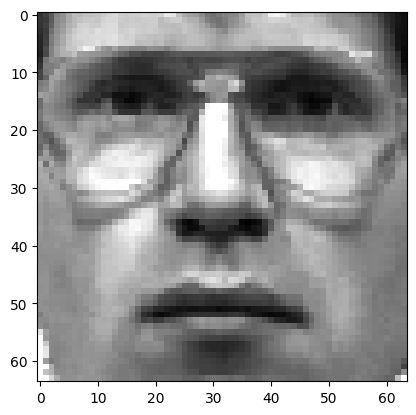

In [1]:
##### Useful libraries
import numpy.linalg
import numpy as np
import matplotlib.pyplot as plt

## Loading YaleFaces database
import scipy.io

yaleFaces = scipy.io.loadmat('./YaleFaces.mat')

# The training set (90 faces)
X_train = yaleFaces['X_train']
cat_train = yaleFaces['cat_train'][0]
id_train = yaleFaces['id_train'][0]-1

# The test set (30 faces)
X_test = yaleFaces['X_test']
cat_test = yaleFaces['cat_test'][0]
id_test = yaleFaces['id_test'][0]-1

# Additional images that don't contain faces 
X_noface = yaleFaces['X_noface']

def showww(X, nth_im):
    im = X[:, nth_im].reshape(64, 64).T
    plt.imshow(im, cmap='gray')
    X_train[0].shape
showww(X_train, 0)

1.  Write a function that computes the average face $x_{moy}$. \
    Tip: use `mean` function from Numpy.

In [2]:
def meanFaces(X):
    """ Array[d,n] -> Vector[d] """
    # It computes the average of all the n images
    return np.mean(X, axis = 1)

2.  Write a function that centers the faces. \
    Recall: center means subtract the average face.

In [3]:
def centeredFaces(X):
    """ Array[d,n]*Vector[d] -> Array[d,n] """
    # Subtracts all the images in X_train from the average face
    x_average = meanFaces(X)
    center = X - x_average[:,np.newaxis] # reshapes the 1D vector into a column vector
    return center

3. Write a function `deflat()` that takes as argument a face, represented as a vector of 4096 elements, and returns an image of size $64\times64$. \
   Important: the Yale Faces database has been created in Matlab, for which the matrices are organized column by column. It may be useful to transpose the matrix.


In [4]:
def deflat(V):
    """" Vector[4096] -> Array[64,64] """
    return V.reshape(64, 64).T

4. Display the average face, as well as a few faces with the associated centered faces. Here is an example of the expected result:
![Figure_3.png](./figs/Figure_3.png)
<center>Figure 3: average face and centering of the database</center>

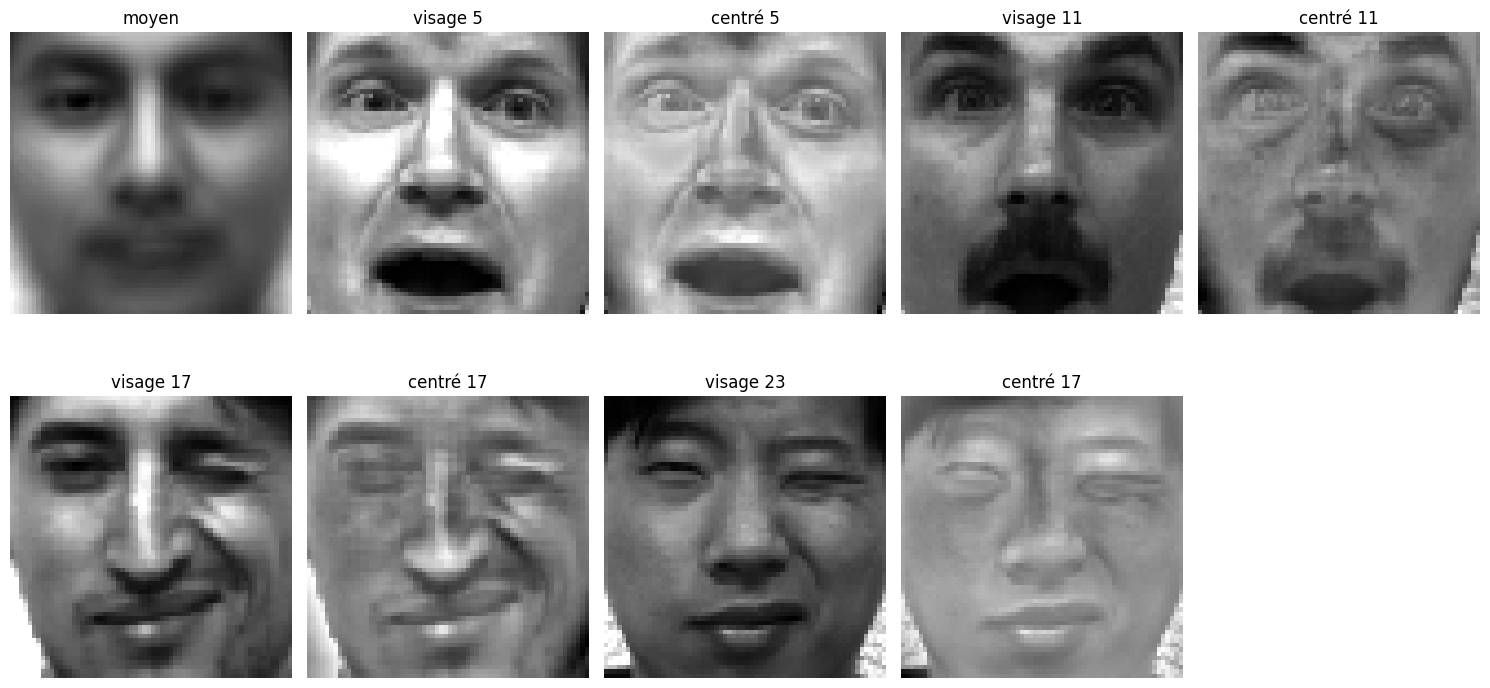

In [5]:
# Recreates Figure 3, 
# displaying the average face as a reference and
# comparing the original faces to their centered versions

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
average_face = meanFaces(X_train)
centered_faces = centeredFaces(X_train)

# moyen
ax[0,0].imshow(deflat(average_face), cmap="gray")
ax[0,0].set_title("moyen")
ax[0,0].axis("off")
# ax[0,0].set_xticks(())
# ax[0,0].set_yticks(())
# ax[0,0].tick_params(color="white")
# ax[0,0].spines[:].set_color("white")

# visage 5
ax[0,1].imshow(deflat(X_train[:,5]), cmap="gray")
ax[0,1].set_title("visage 5")
ax[0,1].axis("off")

# visage centré 5 
ax[0,2].imshow(deflat(centered_faces[:,5]), cmap="gray")
ax[0,2].set_title("centré 5")
ax[0,2].axis("off")

# visage 11
ax[0,3].imshow(deflat(X_train[:,11]), cmap="gray")
ax[0,3].set_title("visage 11")
ax[0,3].axis("off")

# visage 11 centré
ax[0,4].imshow(deflat(centered_faces[:,11]), cmap="gray")
ax[0,4].set_title("centré 11")
ax[0,4].axis("off")

# visage 17
ax[1,0].imshow(deflat(X_train[:,17]), cmap="gray")
ax[1,0].set_title("visage 17")
ax[1,0].axis("off")

# visage 17 centré
ax[1,1].imshow(deflat(centered_faces[:,17]), cmap="gray")
ax[1,1].set_title("centré 17")
ax[1,1].axis("off")

# visage 23
ax[1,2].imshow(deflat(X_train[:,23]), cmap="gray")
ax[1,2].set_title("visage 23")
ax[1,2].axis("off")

# visage 23 centré
ax[1,3].imshow(deflat(centered_faces[:,23]), cmap="gray")
ax[1,3].set_title("centré 17")
ax[1,3].axis("off")

ax[1,4].imshow(np.ones((64,64))*255, vmin=0, vmax=255, cmap="gray")
ax[1,4].axis("off")

fig.tight_layout()
plt.show()

Explanation:

The centered image emphasizes features that differ from the average face. Darker and lighter regions represent where the original face deviates from the mean face. For example, in the image 0th the average face doesnt have glasses, thats why we still visibly see the glasses of the $0$ th image. 

# Exercise 2: Computation of Eigenfaces (PCA)


The method developed by Turk and Pentland defines the eigenfaces as the main axes obtained by carrying out a principal component analysis (PCA) of the vectors associated with the reference faces. 
**The eigenfaces are thus the eigenvectors of the covariance matrix $\mathbf X_c\mathbf X_c^\top$**, of size $d\times d$ , where the matrix $\mathbf X_c$ of the same size as $\mathbf X$ represents all the centered faces:
$$\mathbf X_c= \left[ x_0-x_{moy}, \cdots x_{n-1}-x_{moy}\right]$$
Each line of $\mathbf X_c$ corresponds to a pixel $p$, each column of $\mathbf X_c$ corresponds to a reference face of index $k$.

Rather than using eigenvalue decomposition, we will use singular value decomposition (SVD). 
The SVD decomposes the matrix $\mathbf X_c$ of size $d\times n$ into 3 matrices $\mathbf U$, $\mathbf S$, $\mathbf V$ such as :

$$\mathbf X_c=\mathbf U \mathbf S\mathbf V^\top$$

where $\mathbf U$ and $\mathbf V$ are orthogonal matrices ($\mathbf U \mathbf U^\top=\mathbf U^\top \mathbf U=\mathbf I_d^d$ and $\mathbf V \mathbf V^\top=\mathbf V^\top \mathbf V=\mathbf I_d^n$) of respective sizes $d\times d$ and $n\times n$, and $\mathbf S$ is a matrix of size $d\times n$ with null elements everywhere except on the main diagonal.

This decomposition has the following properties:
- the columns of $\mathbf V$ are the eigenvectors of $\mathbf X_c^\top\mathbf X_c$, 
- the columns of $\mathbf U$ are the eigenvectors of $\mathbf X_c\mathbf X_c^\top$,
- the matrix $\mathbf S$ is diagonal. The diagonal represents the singular values of $\mathbf X_c$, equal to the square roots of the eigenvalues $\lambda_k$ of $\mathbf X_c^\top\mathbf X_c$ and
    $\mathbf X_c\mathbf X_c^\top$. 

With Numpy, the SVD can be calculated by this way:

`U, S, V = numpy.linalg.svd(Xc)`

In our case, $n<d$, and the eigenvalues $\lambda_k$ of $\mathbf X_c\mathbf X_c^\top$ are therefore all null for $k>n$.
We will not need the associated eigenvectors $k>n$. 
The `svd` function has a fast mode, which calculates only the eigenvectors corresponding to the columns of the matrix passed as argument:

`U, S, V = svd(Xc, full_matrices=False)`


This command returns the matrices $\mathbf U$ and $\mathbf V$, of size $d\times n$ and $n\times n$, and the matrix $\mathbf U$ matrix has been truncated, only the first $n$ columns are retained:
$$\mathbf U= \left[ u_1, \cdots, u_n\right]$$
Finally `S` is a vector of size $n$ and represents the diagonal matrix $\mathbf S$.

1. Write a function `eigenfaces(Xc)` which returns a t-uple consisting of the $\mathbf U$ matrix of eigenfaces, computed from a centered database $\mathbf X_c$, and the table of associated eigenvalues.
        

In [6]:
def eigenfaces(Xc):
    """ Array[d,n] -> Array[d,n]*Vector[n] """
    # Takes the centered images and gives U (the eingenfaces) and S (the singular values)
    
    # linear algebra for factorizing a matrix into the three components
    # U: dxn Eigenfaces
    # S: n   Singular values
    # V: nxn Coefficients
    U, S, V = np.linalg.svd(Xc, full_matrices=False) # (eigenfaces, values, face projections)
    return U, S

Xc = centeredFaces(X_train)
U, S = eigenfaces(Xc)
print("Shape of U (eigenfaces):", U.shape)
print("Shape of S (values):", S.shape)
 

Shape of U (eigenfaces): (4096, 90)
Shape of S (values): (90,)


2. Use this function to calculate $\mathbf U$ and $\mathbf S$. Normalize then the eigenvalues so that their sum is equal to 1.


Explanation : 

To normalize the singular values of $S$ so that the sum of the eigenvalues equals to $1$, we need to work with the associated eigenvalues and not directly with $S$. The eigenvalues $\lambda$ are computed from the singular values $S$ as
$\lambda _i=S_i^2$
where $S_i$​ is a singular value. 

Then we normalize as follows: 
$$\lambda _{normalized, i} = \frac{\lambda _i}{\sum \lambda _i}$$

Sum of normalized S: 1.0


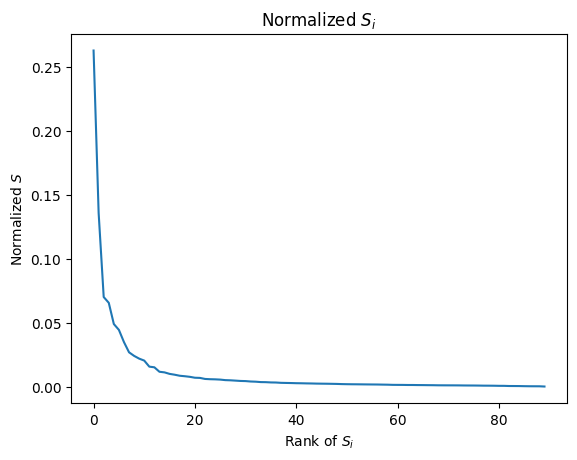

In [7]:
Xc = centeredFaces(X_train)
U, S = eigenfaces(Xc)
eigenvalues = S**2
S_normalized = eigenvalues / np.sum(eigenvalues) 
print("Sum of normalized S:", np.sum(S_normalized)) 

# plotting normalized eigenvalues
plt.plot(S_normalized)
plt.title("Normalized $S_i$")
plt.xlabel("Rank of $S_i$")
plt.ylabel("Normalized $S$")
plt.show()

Explanation:

As we see, the sum of normalized $S$ (the "energy" or weights of importance, ...) is $1.0$ therefore it's equal to one as mentioned. 
In the plot showing the normalized $S$ (relative importance of each eigenface) $Y$-axis by the position of the $S$ (ordered from largest to smallest) $Y$-axis. From the plot we see that the first few eigenfaces show most of the variability in the dataset.

3. Display the average face and the first 15 eigenfaces (see figure 4, use the `plt.subplot()` function).
   and their associated own values. Give your interpretation of the eigenfaces images?

![Figure_4.png](./figs/Figure_4.png)
<center>Figure 4: the 15 first eigenfaces</center>

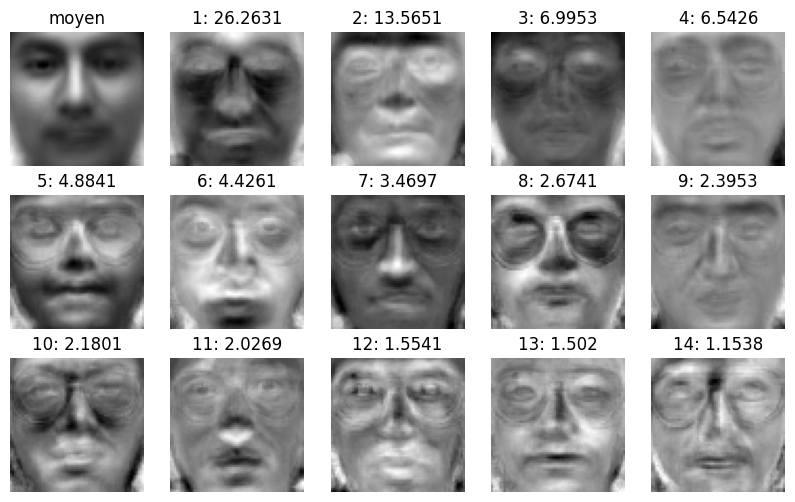

In [8]:
# Recreates Figure 4
# displays the average face and
# the first 14 eigenfaces labeled with their eigenvalue percentages

eigenvalues_percent = S_normalized * 100

fig, axes = plt.subplots(3, 5, figsize=(10, 6)) 
axes = axes.ravel()

axes[0].imshow(deflat(average_face), cmap='gray')
axes[0].set_title("moyen") 
axes[0].axis('off')

for i in range(1, 15):
    axes[i].imshow(deflat(U[:, i-1]), cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f'{i}: {np.round(eigenvalues_percent[i-1],4)}')

plt.show()
    

Explanation:

Each eigenvalue $\lambda_k$​ corresponds to the amount of variance captured by the corresponding eigenface (which is the principal component $k$). Therefore larger eigenvalues indicate more significant features of the dataset. For example, for the image $1$ the eigenvalues being $26.26$ explains $26.26%$ of the total variance (the sum of all eigenvalues equals 100% of the total variance). The dark or light shows positive or negative contributions of pixels to the eigenfaces. 

Dark regions show areas where pixel intensities decrease compared to the average face and vice versa for the light regions.

4. Plot the curve of the cumulative sum of the normalized eigenvalues (see Figure 5 for the expected result), to see how much variation is captured by the first $K$ eigenfaces. How many eigenfaces are needed to obtain a good reconstruction?    
    
![Figure_5.png](./figs/Figure_5.png)
<center>Figure 5: cumulative sum of eigenvalues</center>

Explanation:

Studying how much variation is captured by the first $K$ eigenfaces, first we define "good enough" reconstruction. First we set $95%$ and then $99%$. The results are shown below:

Looking at the results, for obtaining $95%$ of the variance, we need the first $45$ eigenfaces and for obtaining $99%$ of the variance, we need the first $71$.

Number of eigenfaces needed to explain 95% of the variance: 45


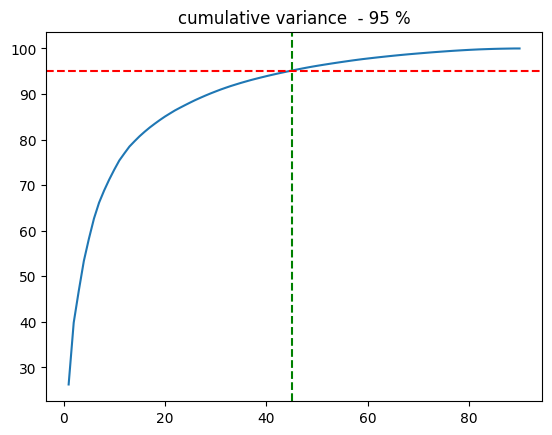

In [9]:
# Determines the number of eigenfaces needed to explain 95% of the variance

cumulative_variance = np.cumsum(S_normalized) * 100
good_explanability = np.argmax(cumulative_variance >= 95)+1  # kth eigenface; +1 is for better readability  

# Display results
print(f"Number of eigenfaces needed to explain 95% of the variance: {good_explanability}")
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.axhline(y=95, color='r', linestyle='--', label='95% Variance')
plt.axvline(x=good_explanability, color='g', linestyle='--', label=f'k={good_explanability}')
plt.title("cumulative variance  - 95 %")
plt.show()

Number of eigenfaces needed to explain 95% of the variance: 71


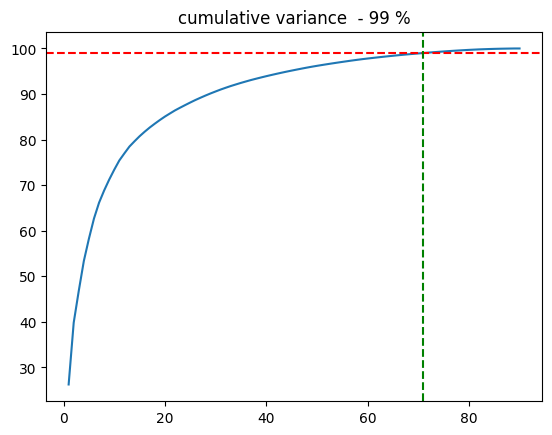

In [10]:
# Determines the number of eigenfaces needed to explain 99% of the variance

cumulative_variance = np.cumsum(S_normalized) * 100
good_explanability = np.argmax(cumulative_variance >= 99) + 1   

# Display results
print(f"Number of eigenfaces needed to explain 95% of the variance: {good_explanability}")
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.axhline(y=99, color='r', linestyle='--', label='95% Variance')
plt.axvline(x=good_explanability, color='g', linestyle='--', label=f'k={good_explanability}')
plt.title("cumulative variance  - 99 %")
plt.show()

# Exercise 3: projection in the subspace of faces


In the following, we use a reduced number of eigenfaces/eigenvectors. The vectorial space of faces, $\mathbf W_K$, is spanned by the basis formed with the $K$ first eigenvectors:

$$\mathbf W_K = \left[ u_1, ..., u_K\right]$$

Note that the set of columns of $W_K$ is an orthonormal basis, so $\mathbf W^\top_K\times \mathbf W_K=\mathbf I_d^K$.

The **projection of a face image $x$ in the face subspace** is simply done by subtracting from $x$ the average face and applying the scalar product with each eigenvector. 
This gives the coordinates of the image $x$ in the subspace of faces, which is of dimension $K$.

Each face therefore has several representations:
-   the original image, a vector $x \in \mathbb{R}^d$
-   the coordinates of the projected image $z$ in the basis of eigenfaces,
    $\left\lbrace a_h\right\rbrace$,
    $h \in\left\lbrace 1;K\right\rbrace$ (subspace of faces):
    $$z = \mathbf W_K^\top (x-x_{average})$$
-   its reconstruction in the original space $\mathbb{R}^d$,
    $\tilde{x}$:
    $$\tilde{x} = x_{average} + \sum_h a_h u_h = x_{moy} + \mathbf W_K  z$$

**The reconstruction error is defined** as the distance between a face $x$ and the associated reconstruction $\tilde x$:
$$E^{recons}(x) =\|x-\tilde{x}\|_2  = \sqrt{\sum_{p=1}^d \left( x(p) - \tilde{x}(p)\right) ^2}$$

1. Write a function `projEigenfaces()` which takes as arguments a face, $x$, the average face, $x_{average}$, the subspace of faces $\mathbf W$, the number of eigenfaces $K$, and  computes the coordinates of projected face $z$ in the subspace $\mathbf W_K$ of faces.    

In [11]:
def projEigenface(x, x_mean, W, K):
    """ Vector[d]*Vector[d]*Array[d,n]*int -> Vector[K] """
    # Projects a face image x into the subspace of the first K eigenfaces
    x_centered = x - x_mean
    W_K = W[:, :K]
    z_k = W_K.T @ x_centered
    return z_k

2.  Write a function `reconstruct()` which takes as arguments a projected face, $z$, the average face, $x_{average}$, and the truncated subspace of face, $W$ and $K$, and computes the coordinate of $x$ in the original space ($\mathbb{R}^n$).    

In [12]:
def reconstruct(z, x_mean, W, K):
    """Vector[K]*Vector[d]*Array[d,n]*int -> Vector[d] """
    # Reconstructs a face using the first K eigenfaces
    W_K = W[:, :K]
    x_r = x_mean + W_K @ z
    return x_r


3.  Write a function  `errorReconstruct()` which computes the recontruction error between $\tilde{x}$ and $x$.

In [13]:

def errorReconstruct(x_r, x):
    """Vector[d]*Vector[d] -> float """
    # L2 norm of face - reconstructed face
    return np.linalg.norm(x - x_r)

4.  Write a function `affiche_Reconstruction()` which displays:
    - the original face $x$,
    - the reconstructed faces $x_r$ for various values of $K$ (for instance, $K =$ 5, 10, 25, 50, 90).

In [14]:
def affiche_reconstruction(x, x_mean, W, listK):
    """ Vector[d]*Vector[d]*Array[d,n]*list[int] -> NoneType """
    # visualizes the reconstruction of a face using varying numbers of eigenfaces
    fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

    ax[0,0].imshow(deflat(x), cmap="gray")
    ax[0,0].set_title("original face")
    ax[0,0].axis("off")
    axis = ax.flatten()
    
    for ind, k in enumerate(listK):
        z = projEigenface(x, x_mean, W, k)
        x_r = reconstruct(z, x_mean, W, k)

        axis[ind+1].imshow(deflat(x_r), cmap="gray")
        axis[ind+1].set_title(errorReconstruct(x_r, x))
        axis[ind+1].axis("off")

    fig.tight_layout()
    plt.show()

Reconstruction Error for Image 55 (Train Base, K=90): 0.0000


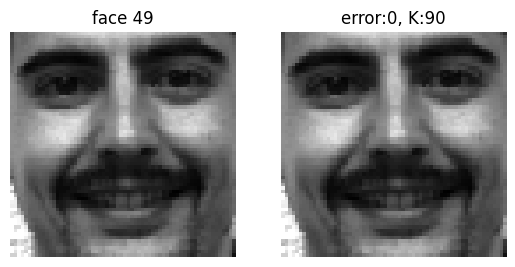

In [15]:
# displays the original face taken from the training set along with 
# the reconstructed face using the first 90 eigenfaces derived from 
# the training set labeled by its reconstruction error

x_mean = meanFaces(X_train)
Xc = centeredFaces(X_train)
U, _ = eigenfaces(Xc)

x = X_train[:, 49]
image_index_train = 55-1  # -1 for zero-based indexing
x_train = X_train[:, image_index_train]  # Original face (not centered)
K = 90

z = projEigenface(x, x_mean, U, K)
x_r = reconstruct(z, x_mean, U, K)
error_train = errorReconstruct(x_r, x)

print(f"Reconstruction Error for Image 55 (Train Base, K=90): {error_train:.4f}")

plt.subplot(1, 2, 1)
plt.imshow(deflat(x), cmap='gray')
plt.title("face 49")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(deflat(x_r), cmap='gray')
plt.title(f"error:{int(error_train)}, K:{K}")
plt.axis('off')

plt.show()

Reconstruction Error for Image 17 (Test Base, K=90): 258.3345


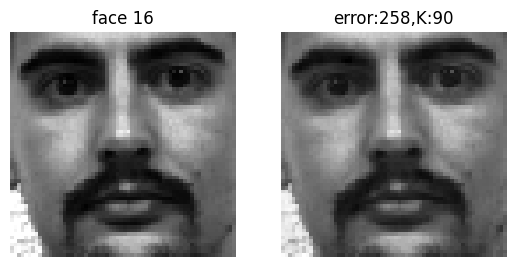

In [16]:
# displays the original face taken from the training set along with 
# the reconstructed face using the first 90 eigenfaces derived from 
# the test set labeled by its reconstruction error

x_mean = meanFaces(X_train) # using the train set 
Xc = centeredFaces(X_test) 
U, _ = eigenfaces(Xc)

x = X_test[:, 16]
image_index_test = 17-1  # -1 for zero-based indexing
x_test = X_test[:, image_index_test]  # Original face (not centered)
K = 90

z = projEigenface(x, x_mean, U, K)
x_r = reconstruct(z, x_mean, U, K)
error_test = errorReconstruct(x_r, x)

print(f"Reconstruction Error for Image 17 (Test Base, K={K}): {error_test:.4f}")

plt.subplot(1, 2, 1)
plt.imshow(deflat(x), cmap='gray')
plt.title(f"face 16")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(deflat(x_r), cmap='gray')
plt.title(f"error:{int(error_test)},K:{K}")
plt.axis('off')

plt.show()

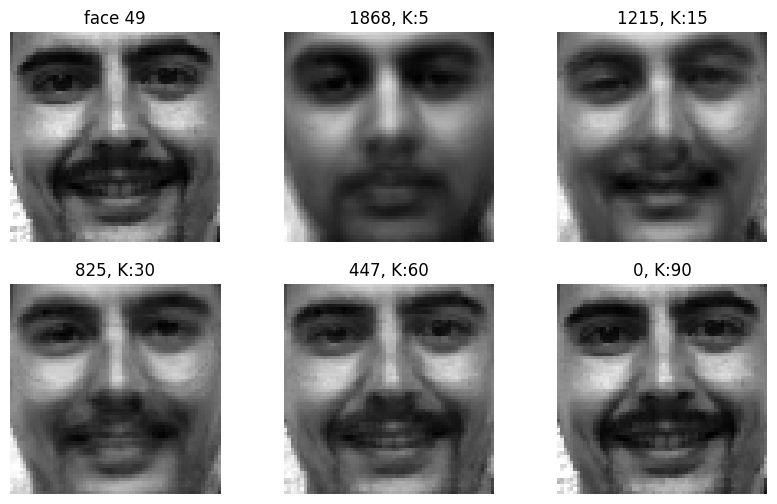

In [17]:
# displays the original face taken from the training set along with 
# the reconstructed face using different numbers K of eigenfaces derived from 
# the training set labeled by its reconstruction error

x_mean = meanFaces(X_train)
Xc = centeredFaces(X_train)
U, _ = eigenfaces(Xc)

x = X_train[:, 49]
image_index_train = 55-1  # -1 for zero-based indexing
x_train = X_train[:, image_index_train]  # Original face (not centered)
K_values = [5, 15, 30, 60, 90]

fig, axes = plt.subplots(2, 3, figsize=(10, 6)) 
axes = axes.ravel()

axes[0].imshow(deflat(x), cmap='gray')
axes[0].set_title("face 49") 
axes[0].axis('off')

for i, K in enumerate(K_values):
    z = projEigenface(x, x_mean, U, K)
    x_r = reconstruct(z, x_mean, U, K)
    error_train = errorReconstruct(x_r, x)
    axes[i+1].imshow(deflat(x_r), cmap='gray')
    axes[i+1].axis('off')
    axes[i+1].set_title(f"{int(error_train)}, K:{K}")

plt.show()

5.  Test the previous functions by displaying the projection/reconstruction result for several images (from the training and test bases). Figure 6 shows the result of the reconstruction for image 50 of the training base. For image 55 of the training base, what is the reconstruction error for $K=n=90$? Is the image identical to its reconstruction? Same question for image 17 of the test base.

![Figure_6.png](./figs/Figure_6.png)
<center>Figure 6: Example of reconstruction for image number 50</center>

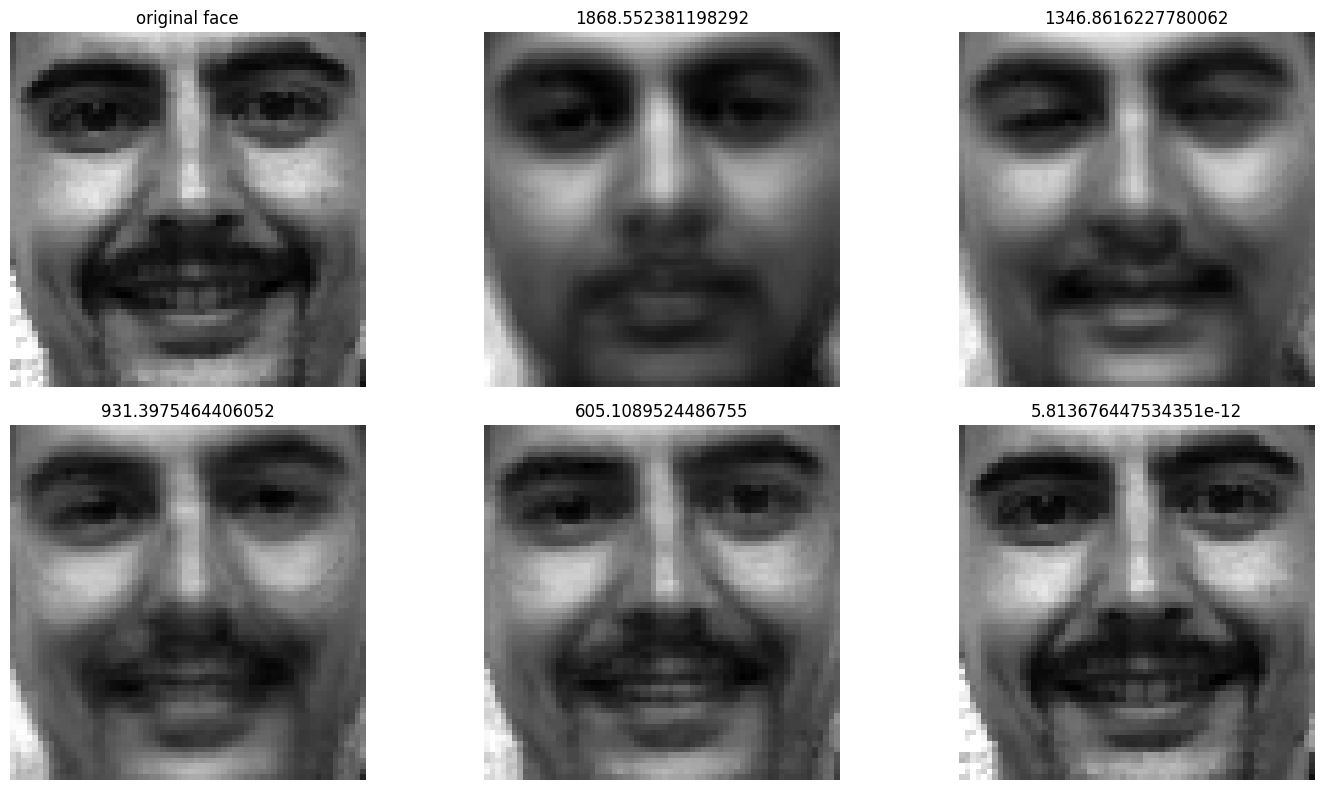

In [18]:
# displays the reconstruction of the 50th image of the training dataset using
# different numbers of eigenfaces
affiche_reconstruction(X_train[:,49], average_face, U, [5, 10, 25, 50, 90])

Explanation:

The eigenfaces are ordered by the amount of variance they explain in the dataset.
The first few eigenfaces (small $K$) capture the most significant variations (global features like lighting, shape). With small $K$ infact, the subspace is too limited to fully approximate the face, which leads to a large error
Higher-order eigenfaces (larger $K$) capture finer details (smaller variations, such as facial expressions, ...).
When you use more eigenfaces ($K$ increases), you include more directions of variation, which allows you to reconstruct the face with greater accuracy.
If $K=n$ (for train: $90$) (maximum eigenfaces), the reconstruction error is zero because the entire variance of the dataset is captured.

6. Is there a difference between the reconstructions of the faces from the training base and those from the test base? Why?

Reconstruction error for training face: 0.00
Reconstruction error for test face: 899.95


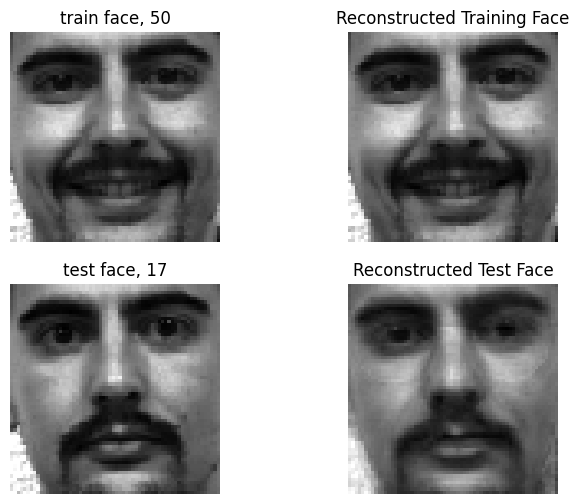

In [19]:
# Displays the reconstruction of the 50th training face and
# the 17th test face using the first K=90 eigenfaces

K = 90 

# Training face
x_train = X_train[:, 49] 
z_train = projEigenface(x_train, x_mean, U, K)
x_r_train = reconstruct(z_train, x_mean, U, K)
error_train = errorReconstruct(x_r_train, x_train)

# Test face
x_test = X_test[:, 16] 
z_test = projEigenface(x_test, x_mean, U, K)
x_r_test = reconstruct(z_test, x_mean, U, K)
error_test = errorReconstruct(x_r_test, x_test)

print(f"Reconstruction error for training face: {error_train:.2f}")
print(f"Reconstruction error for test face: {error_test:.2f}")

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

axes[0, 0].imshow(deflat(x_train), cmap='gray')
axes[0, 0].set_title("train face, 50")
axes[0, 0].axis("off")

axes[0, 1].imshow(deflat(x_r_train), cmap='gray')
axes[0, 1].set_title("Reconstructed Training Face")
axes[0, 1].axis("off")

axes[1, 0].imshow(deflat(x_test), cmap='gray')
axes[1, 0].set_title("test face, 17")
axes[1, 0].axis("off")

axes[1, 1].imshow(deflat(x_r_test), cmap='gray')
axes[1, 1].set_title("Reconstructed Test Face")
axes[1, 1].axis("off")

plt.show()

Explanation : 

The reconstructed faces from the training set are more accurate because the eigenfaces were derived and optimized for this set. As a result, the model has already learned the key features of the training images, leading to lower reconstruction errors.

In contrast, faces from the test set have higher reconstruction errors because they contain unknown variations not captured by the eigenfaces. Even for large values of $K$, where finer details are added, the error does not reach zero and instead plateaus. This happens because the model tries to reconstruct new faces using only the features it learned from the training set, which are not always sufficient to represent the test images perfectly.

The error decreases sharply for small $K$ as the first few eigenfaces capture most of the variance, and the decline slows for larger $K$.

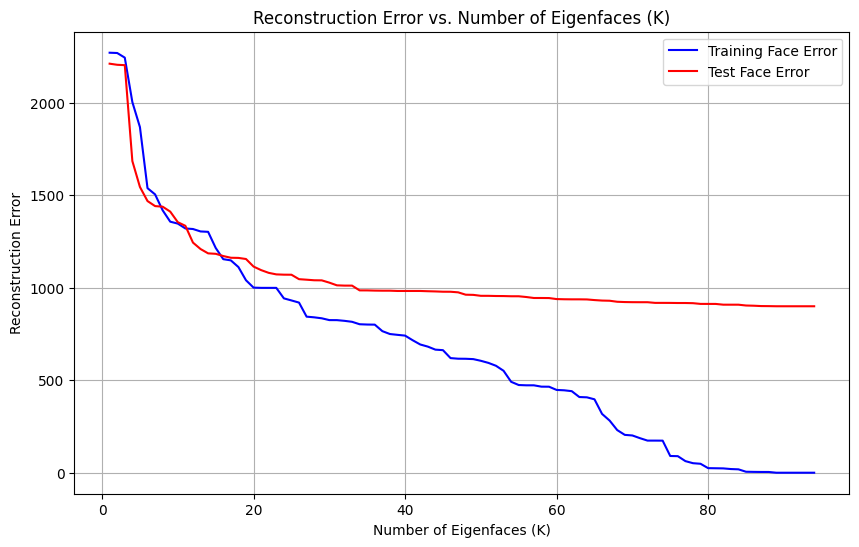

In [20]:
# plots the reconstruction error for a training face and a 
# test face over a range of eigenfaces K

errors_train = []
errors_test = []
K_values = range(1, 95)  

for K in K_values:
    # Training face reconstruction
    z_train = projEigenface(x_train, x_mean, U, K)
    x_r_train = reconstruct(z_train, x_mean, U, K)
    error_train = errorReconstruct(x_r_train, x_train)
    errors_train.append(error_train)
    
    # Test face reconstruction
    z_test = projEigenface(x_test, x_mean, U, K)
    x_r_test = reconstruct(z_test, x_mean, U, K)
    error_test = errorReconstruct(x_r_test, x_test)
    errors_test.append(error_test)

plt.figure(figsize=(10, 6))
plt.plot(K_values, errors_train, label='Training Face Error', color='blue')
plt.plot(K_values, errors_test, label='Test Face Error', color='red')
plt.xlabel("Number of Eigenfaces (K)")
plt.ylabel("Reconstruction Error")
plt.title("Reconstruction Error vs. Number of Eigenfaces (K)")
plt.legend()
plt.grid()
plt.show()


Explanation:

As we see the results above, the reconstructed faces from the test examples for large $K$ don't become exactly like the original face. In fact, even for the large K the error doesnt become zero and plateus around $800$. Faces from the training base are reconstructed with higher accuracy because the eigenfaces were optimized for this set. so we can say that faces from the test base have a higher reconstruction error because they may contain variations not captured by the eigenfaces.

In the plot we see a sharp decrease in error for small values of $K$ because the first few eigenfaces capture most of the variance, and a gradual decrease in error for larger values of $K$, where finer details are added.

7. __Bonus question__: Plot the evolution of the average error of reconstruction of test faces when $K$ varies from 1 to $N$. Is this evolution consistent with the cumulative sum previously calculated (exercise 2, question 4)?

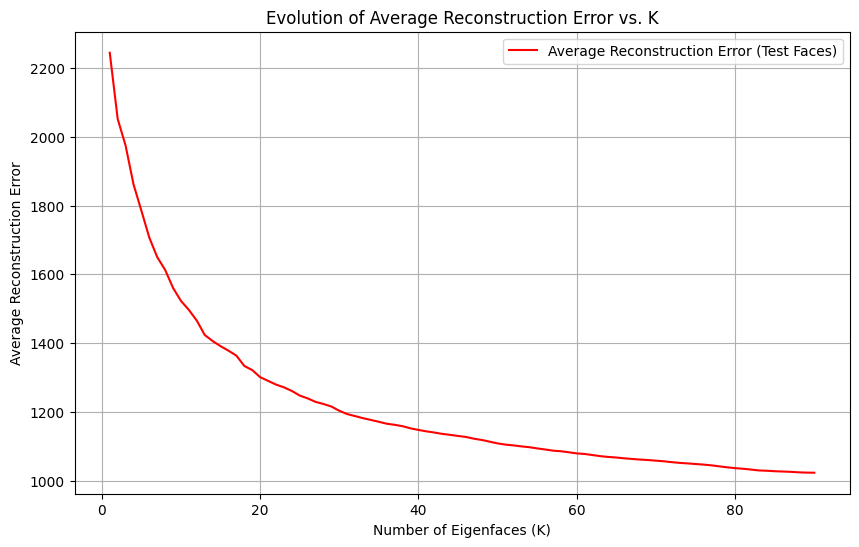

In [21]:
# plots the average reconstruction error of test faces over a range of eigenfaces K

x_mean = meanFaces(X_train)
Xc = centeredFaces(X_train)
U, _ = eigenfaces(Xc)

average_errors = []
K_values = range(1, X_train.shape[1] + 1) 

for K in K_values:
    errors = []  
    for i in range(X_test.shape[1]): 
        x_test = X_test[:, i]  
        z = projEigenface(x_test, x_mean, U, K) 
        x_r = reconstruct(z, x_mean, U, K)      
        error = errorReconstruct(x_r, x_test)  
        errors.append(error)
    average_errors.append(np.mean(errors))

plt.figure(figsize=(10, 6))
plt.plot(K_values, average_errors, label="Average Reconstruction Error (Test Faces)", color='red')
plt.xlabel("Number of Eigenfaces (K)")
plt.ylabel("Average Reconstruction Error")
plt.title("Evolution of Average Reconstruction Error vs. K")
plt.grid()
plt.legend()
plt.show()


Explanation:

The average reconstruction error will decrease as K increases. This is consistent with the cumulative sum of eigenvalues: The cumulative sum curve increases with K as more variance is captured and the reconstruction error curve decreases because more eigenfaces allow better reconstruction.

# Exercise 4: Face recognition and identification

Each reference face $x_k^{train}$ has an identity associated with it, in the form of a $id^{train}(k)$ number. In this section, we try to identify a face $x^{test}$ from the reference faces.

The simplest method is to compare the projection $z^{test}$ of the test face $x^{test}$ with the projection $z_k^{train}$ of each reference image $x_k^{train}$ (see Figure 7). The dissimilarity between the two projected vectors is quantified by the distance in subspace $E_k(x^{test})$:

$$E_k(x^{test}) =\|z^{test}-z_k^{train}\|_2$$

![Figure_7.png](./figs/Figure_7.png)
<center>Figure 7: Projection of an image $J$ in the subspace of faces and comparison with a reference face $I_k$, in case $K=2$.<center>

This distance is evaluated for each reference face, we can determine the reference face $x_k^{train}$ closest to the test face $x^{test}$. **Its identifier $id^{train}(k)$ then allows for the recognition of the tested face.**


1.  What is the advantage of calculating the distance $E_k(x^{test})$ in the subspace of faces rather than in the original space?

Your answer: 

The advantage is dimensionality reduction. The original space has a very high dimensionality $d$ ($d=4096$ for $64 \times 64$ images). By projecting the faces into the subspace spanned by the first $K$ eigenfaces ( $K≪d$ ) we reduce the dimensionality significantly, making computations (like distance calculations) much faster. 

We also can obtain noise reduction. The eigenfaces are ordered by the amount of variance they explain in the data. By projecting into the subspace spanned by the top $K$ eigenfaces, we filter out noise and retain only the significant info about the faces.

Also, because instead of comparing raw pixel values, which may include irrelevant information, we compare the important features extracted by the eigenfaces, taking out most important features helps up in feature extractions. 

2.  Write a function ``computeMatDist()`` which takes as arguments the training set of centered faces, $\mathbf Xc_{train}$ of size $d\times N_{train}$, the test set of centered faces, $\mathbf Xc_{test}$ of size $d\times N_{test}$, the subspace of eigenfaces, $\mathbf W$ and $K$, and computes the matrix $D$ of distance between a face of the test set and a face of the training set. $D$ is of size $N_{test} \times N_{train}$.

In [22]:
def calculMatDist(X_train, X_test, W, K):
    """ Array[d,n]*Array[d,m]*Array[d,n]*int -> Array[m,n] """
    # Computing the matrix of distances between test and train in the subspace of eigenfaces

    Xc_train = centeredFaces(X_train)
    Xc_test = centeredFaces(X_test)
    
    W_K = W[:, :K]
    Z_train = W_K.T @ Xc_train
    Z_test = W_K.T @ Xc_test

    N_test = Z_test.shape[1]
    N_train = Z_train.shape[1]
    
    D = np.zeros((N_test, N_train)) 
    
    for i in range(N_test):
        for j in range(N_train):
            D[i, j] = np.linalg.norm(Z_test[:, i] - Z_train[:, j])  

    return D


3.  Write a function `identification()` which takes as argument the matrix of distances $D$ (computed by the previous function), the vector of identification of the training set $id^{train}$, and returns the identificaton vector $\hat{id}^{test}$ of size $N_{test}$ of the elements of the test set.

In [23]:
def identification(D, id_train):
    """ Array[m,n]*Array[n] -> Array[m] """
    # for each test face, gives the closest train face id 
    # finally it returns the array of the closest indexes for the test faces
    N_test = D.shape[0]
    id_test_pred = np.zeros(N_test, dtype=int)

    for i in range(N_test):
        closest_index = np.argmin(D[i, :])
        id_test_pred[i] = id_train[closest_index]

    return id_test_pred

4. Compute for $K=30$ the identification rate by comparing $\hat{id}^{test}$ to $id^{test}$ labels. Then vary $K$, and plot the curve of the number of recognized faces as a function of $K$. Explain the shape of the curve obtained. Which value of $K$ can be taken to have a good recognition and a low calculation time?

In [24]:
# computes the identification rate for K=30 eigenfaces 
# by comparing predicted IDs with actual test IDs

x_mean = meanFaces(X_train)
Xc = centeredFaces(X_train)
U, _ = eigenfaces(Xc)

K = 30
D = calculMatDist(X_train, X_test, U, K)

id_test_hat = identification(D, id_train)
accuracy = np.sum(id_test_hat == id_test) / len(id_test)
print(f"Identification rate for K={K}: {accuracy * 100:.2f}%")
print("Id test hat =", id_test_hat)


Identification rate for K=30: 90.00%
Id test hat = [ 0  0  1 11  2  2  3  3  4  4  5  5  6  6  7  3  8  8  9  9 10 10 11  5
 12 12 13 13 14 14]


In [ ]:
# computes and plots the identification rate as a function of 
# the number of eigenfaces K

K_values = range(1, 45) 
results = [] 

for K in K_values:
    D = calculMatDist(X_train, X_test, U, K)
    id_test_hat = identification(D, id_train)
    accuracy = np.sum(id_test_hat == id_test) / len(id_test)
    results.append((K, accuracy)) 

for k, acc in results:
    print(f"K = {k}, rate = {(acc* 100)}")

plt.figure(figsize=(8, 6))
plt.plot([k for k, _ in results], [acc for _, acc in results], color='b')
plt.xlabel("Number of Eigenfaces (K)")
plt.ylabel("Identification Rate (%)")
plt.title("Recognition Rate vs. Number of Eigenfaces")
plt.grid(True)
plt.show()


Explanation:

The identification rate measures how accurately the system can recognize test faces by comparing their predicted identities to the truth identities. As we see, for $K=30$, it maxes out, giving $90%$ accurecy. 

About the plot: at the initial phase the rate increases rapidly with $K$. The system has low accuracy because only very general features are captured. at $K = 30$ the rate stabilizes at approximately $90%$. This means that $30$ eigenfaces are sufficient to capture most of the important variance in the dataset needed to distinguish faces accurately, as mentioned before. 

About fluctuations in the middle of the plot (for example at $K=10$): at around $K=10$ the eigenfaces begin to include small-scale variations in the training data, which may capture details that are specific to the training faces but do not generalize well to test faces.

5.  **Bonus question**: for $K=30$, calculate for each face of the training set its distance in the subspace $\mathbf W_K$ from each element of the training set. Display the result as the image of a matrix. Comment the result.

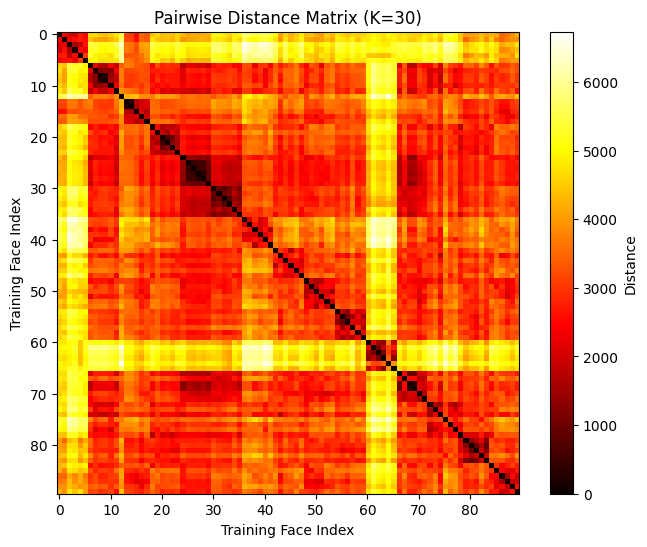

In [28]:
K = 30
x_mean = meanFaces(X_train)
Xc_train = centeredFaces(X_train)

W_K = U[:, :K] 
Z_train = W_K.T @ Xc_train 
N_train = Z_train.shape[1]
D = np.zeros((N_train, N_train))  

for i in range(N_train):
    for j in range(N_train):
        D[i, j] = np.linalg.norm(Z_train[:, i] - Z_train[:, j]) 

plt.figure(figsize=(8, 6))
plt.imshow(D, cmap='hot', interpolation='nearest')  
plt.colorbar(label="Distance")
plt.title(f"Pairwise Distance Matrix (K={K})")
plt.xlabel("Training Face Index")
plt.ylabel("Training Face Index")
plt.show()

Explanation : 

The minimal distances in the training set appear on the diagonal of the distance matrix, as the diagonal represents the distance (0) between identical images. This is logical because we are comparing images with themselves, and the matrix is symmetrical: comparing image A with image B is the same as comparing image B with image A.

Additionally, we observe clusters along the diagonal. These clusters reflect how the dataset is organized: in the training set, each person has multiple images (typically 6) with slight variations, such as expressions or accessories. These consecutive images of the same person form dark squares along the diagonal, grouping faces from the same category, while lighter regions indicate larger distances between faces of different individuals.

Outlier Indices (with avg distance threshold: 4500 ): [ 2  3  4  5 61 62 63 64 65]


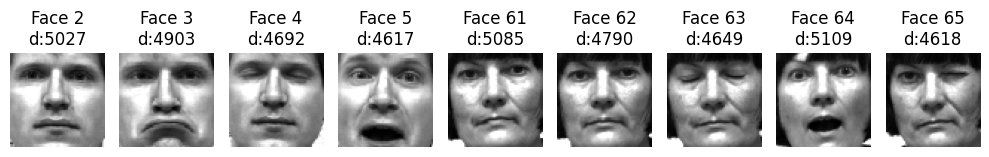

In [ ]:
def identify_outliers(D, threshold):
    """
    Identifies indices of faces that have high average distances to others
    """
    avg_distances = np.mean(D, axis=1) 
    outlier_indices = np.where(avg_distances > threshold)[0]  
    return outlier_indices, avg_distances

K = 30
# Identifying outliers
thresh = 4500
outlier_indices, avg_distances = identify_outliers(D, threshold=thresh)

print(f"Outlier Indices (with avg distance threshold: {thresh} ):", outlier_indices)

# plotting the outlier faces
fig, axes = plt.subplots(1, len(outlier_indices), figsize=(10, 5))

for i, idx in enumerate(outlier_indices):
    axes[i].imshow(deflat(X_train[:, idx]), cmap='gray')
    axes[i].set_title(f"Face {idx}\nd:{int(avg_distances[idx])}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Explanation:

As we see, the heatmap showing the average distance of a face comparing to another face (both in the training set) displays the outliers ( the faces that are far different to other faces). If we se the threshold to $4500$ (the average distance), we can find, the outliers, the $9$ faces shown above. 

And for the threshold between $2500-3000$ (low average distance with other faces, in another word the faces that are close to other faces) we find the faces below. 

Indices of faces with avg distances between 1000 and 3000: [24 25 26 27 28 29 32 33 35 66 68 69 74 78 81]


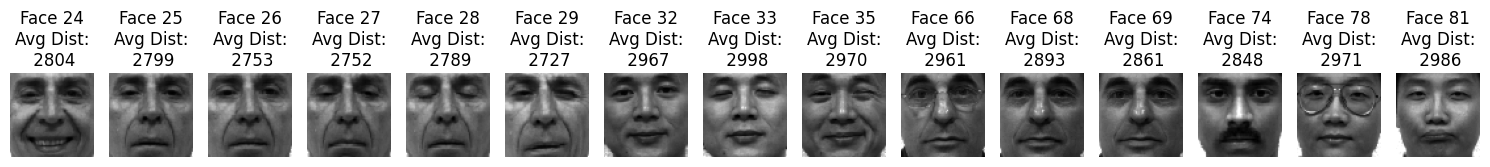

In [ ]:
def identify_outliers_min(D, lower_threshold=1000, upper_threshold=2000):
    avg_distances = np.mean(D, axis=1) 
    condition = (avg_distances > lower_threshold) & (avg_distances < upper_threshold)
    outlier_indices = np.where(condition)[0] 
    return outlier_indices, avg_distances

K = 30
lower_thresh, upper_thresh = 1000, 3000
outlier_indices, avg_distances = identify_outliers_min(D, lower_thresh, upper_thresh)

print(f"Indices of faces with avg distances between {lower_thresh} and {upper_thresh}: {outlier_indices}")

fig, axes = plt.subplots(1, len(outlier_indices), figsize=(15, 5))

for i, idx in enumerate(outlier_indices):
    axes[i].imshow(deflat(X_train[:, idx]), cmap='gray')
    axes[i].set_title(f"Face {idx}\nAvg Dist:\n {int(avg_distances[idx])}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


6. **Bonus question**: What are the minimal and maximal distances between two faces of the same category (i.e. same person)? Between two faces of different categories? If we want to choose a threshold $\theta$  to detect the presence of an unknown face, which indications do the previous min/max values give us?

In [ ]:
def min_max_distances(D, id_train):
    """gives the minimal and maximal distances between faces of same and diff cat
    """
    N = len(id_train)
    same_distances = []
    diff_distances = []
    for i in range(N):
        for j in range(i+1, N): 
            if id_train[i] == id_train[j]:
                same_distances.append(D[i, j])
            else:
                diff_distances.append(D[i, j])
    same_min = np.min(same_distances)
    same_max = np.max(same_distances)
    diff_min = np.min(diff_distances)
    diff_max = np.max(diff_distances)
    return same_min, same_max, diff_min, diff_max


K = 30

same_min, same_max, diff_min, diff_max = min_max_distances(D, id_train)

print(f"min dist (same category): {same_min:.2f}")
print(f"max dist (same category): {same_max:.2f}")
print(f"min dist (different categories): {diff_min:.2f}")
print(f"max dist (different categories): {diff_max:.2f}")

theta = (same_max + diff_min) / 2
print(f"choosing this threshold θ: {theta:.2f}")


min dist (same category): 270.87
max dist (same category): 4426.72
min dist (different categories): 1264.61
max dist (different categories): 6730.63
choosing this threshold θ: 2845.67


# Exercise 5: face/non-face classification

Until now, we focused on comparing facial images with each other. However, the method provides information that we have not yet used. In particular, the reconstruction error can be used to verify that an image is indeed an image of a face. When an image contains something other than a face (an image of a flower, a person seen in its entirety, a random image...), we can say that it is a non-face (database *noface*).

![figure8](./figs/Figure_8.png)
<center>Figure 8: Illustration of possible cases for classifying an image: case 1,2) $Z$ close to subspace: it is a face 3,4) $Z$ far from subspace: it is not a face, 1) $Z$ is an identified face, case 2) $z$ is an unknown face, case 3) risk of identifying $Z$ as a face when it is not.

1.  With $K=30$, for each set, training set, test set, and *noface* set, plot the reconstruction error of all the images of each set (this provides 3 plots). Compute the minimal, average, maximal errors for the three sets. Which conclusion can be drawn?

In [ ]:
def reconstErrorPlot(X, verbose=True, name_base=""):
    """ Array[d,n] -> Array[n] """
    # computes and optionally prints the minimum, 
    # average, and maximum reconstruction errors 
    error = []
    for i in range(X.shape[1]):
        z = projEigenface(X[:, i], x_mean, U, 30)
        x_r = reconstruct(z, x_mean, U, 30)
        error.append(errorReconstruct(x_r, X[:, i]))

    if verbose:
        print(f"reconstruction error {name_base} : \n minimal error:{np.min(error):.2f}, average error:{np.mean(error):.2f}, maximal error:{np.max(error):.2f}")

    return error

error_train = reconstErrorPlot(X_train, name_base="X_train")
error_test = reconstErrorPlot(X_test, name_base="X_test")
error_noface = reconstErrorPlot(X_noface, name_base="X_noface")  


reconstruction error X_train : 
 minimal error:536.44, average error:811.97, maximal error:1080.76
reconstruction error X_test : 
 minimal error:565.50, average error:1203.13, maximal error:1738.37
reconstruction error X_noface : 
 minimal error:1984.83, average error:3519.30, maximal error:4882.10


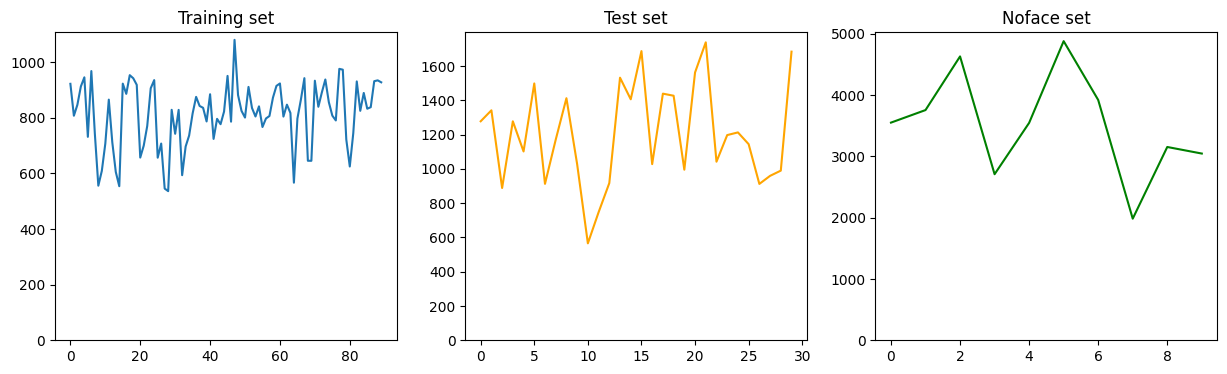

In [ ]:
# plots the reconstruction errors for the training set, 
# test set and noface set side by side for comparison
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# training set
ax[0].plot(error_train)
ax[0].set_ylim(bottom=0)
ax[0].set_title("Training set")

# test set
ax[1].plot(error_test, c="orange")
ax[1].set_ylim(bottom=0)
ax[1].set_title("Test set")

# noface set
ax[2].plot(error_noface, c="green")
ax[2].set_ylim(bottom=0)
ax[2].set_title("Noface set")

plt.show()

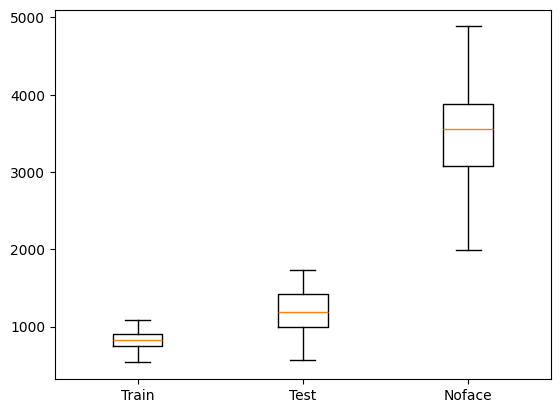

In [ ]:
# creates a boxplot to compare the distribution of reconstruction errors for the training set, test set, and noface set
plt.boxplot([error_train, error_test, error_noface])
plt.xticks([1, 2, 3], ["Train", "Test", "Noface"])
plt.show()

The errors for non-face images are larger and show greater variance compared to the test and training sets. The minimal, average, and maximal reconstruction errors are comparable between the training and test sets, although the test set has more variance because it represents our predictions. Astronomical errors occur when reconstructing images that are not faces, which is expected since our model was designed and trained to recognize faces. This demonstrates that our model is highly effective at distinguishing faces from non-faces, such as objects, which is precisely our goal.

2. Visualize the reconstruction error by displaying the original image and the reconstructed image for 10 images of the face database, and for the 10 images of the noface database. Comment the results.

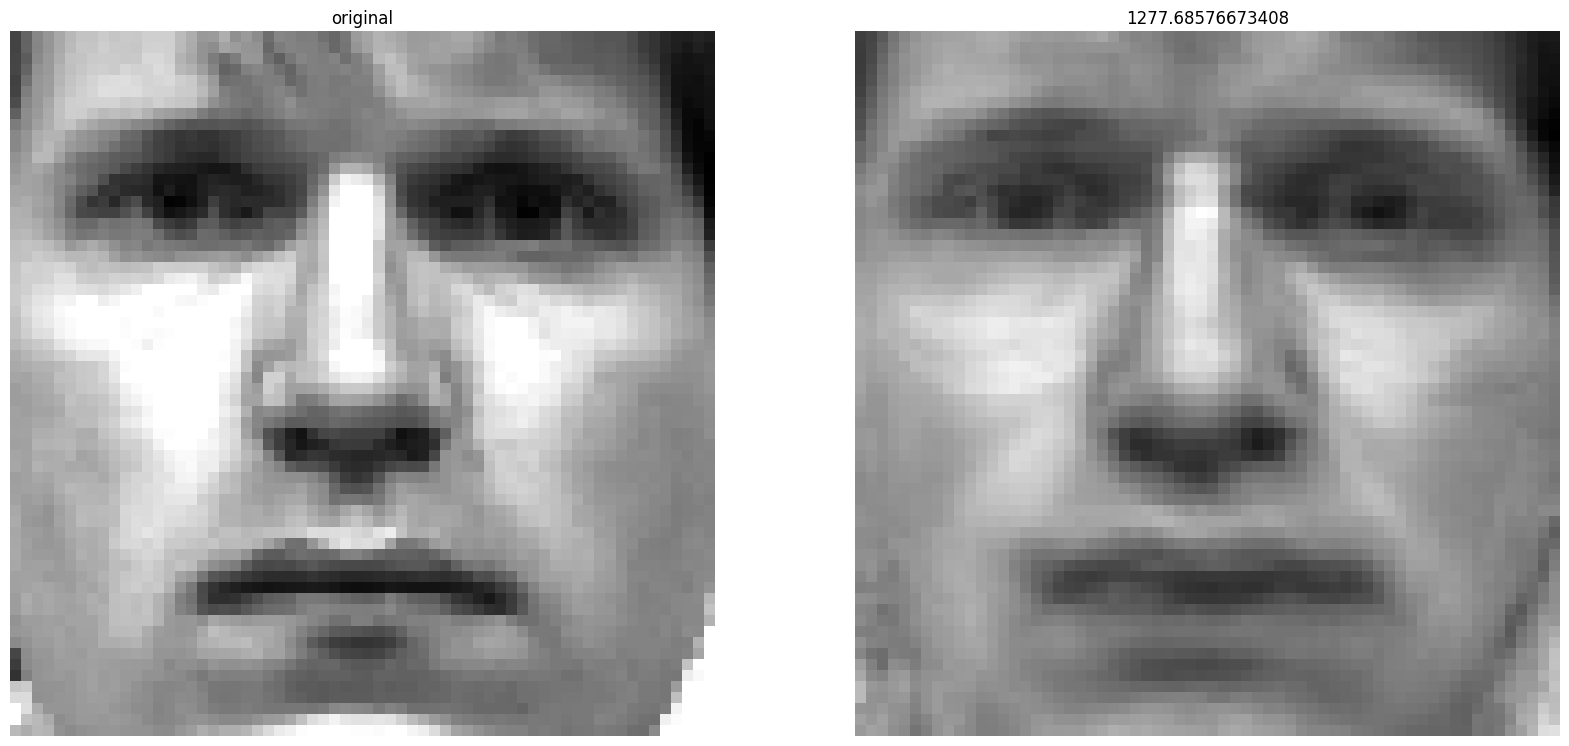

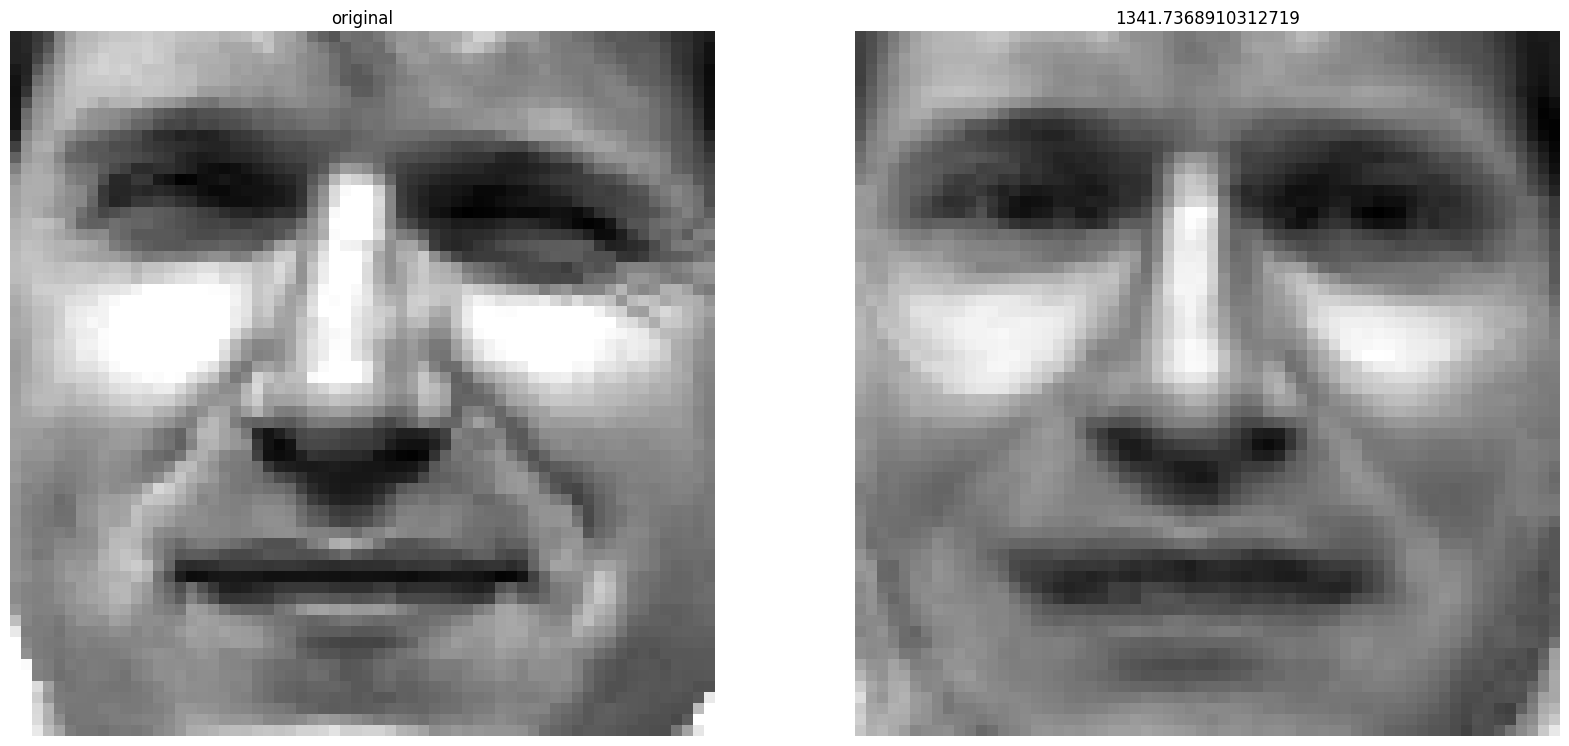

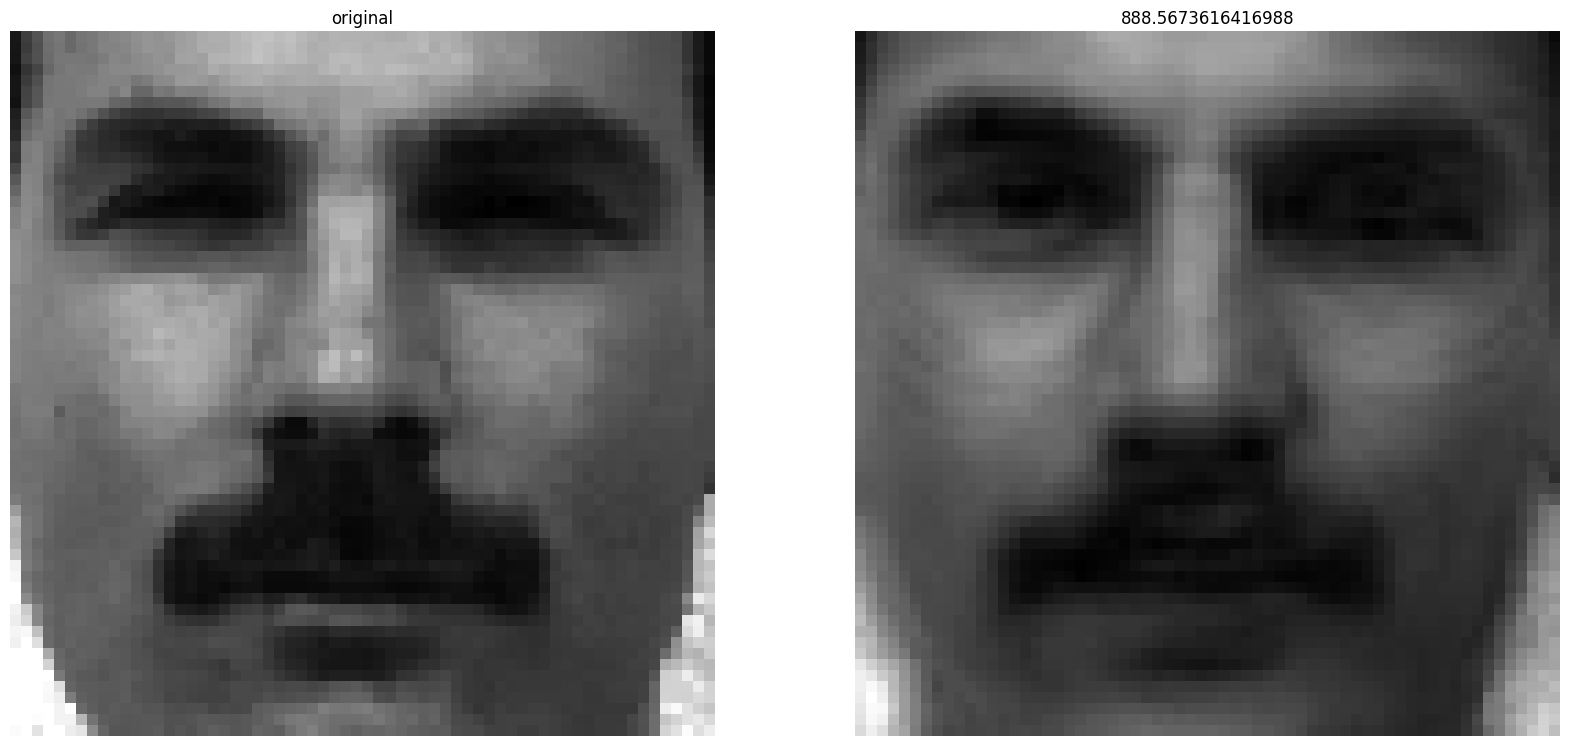

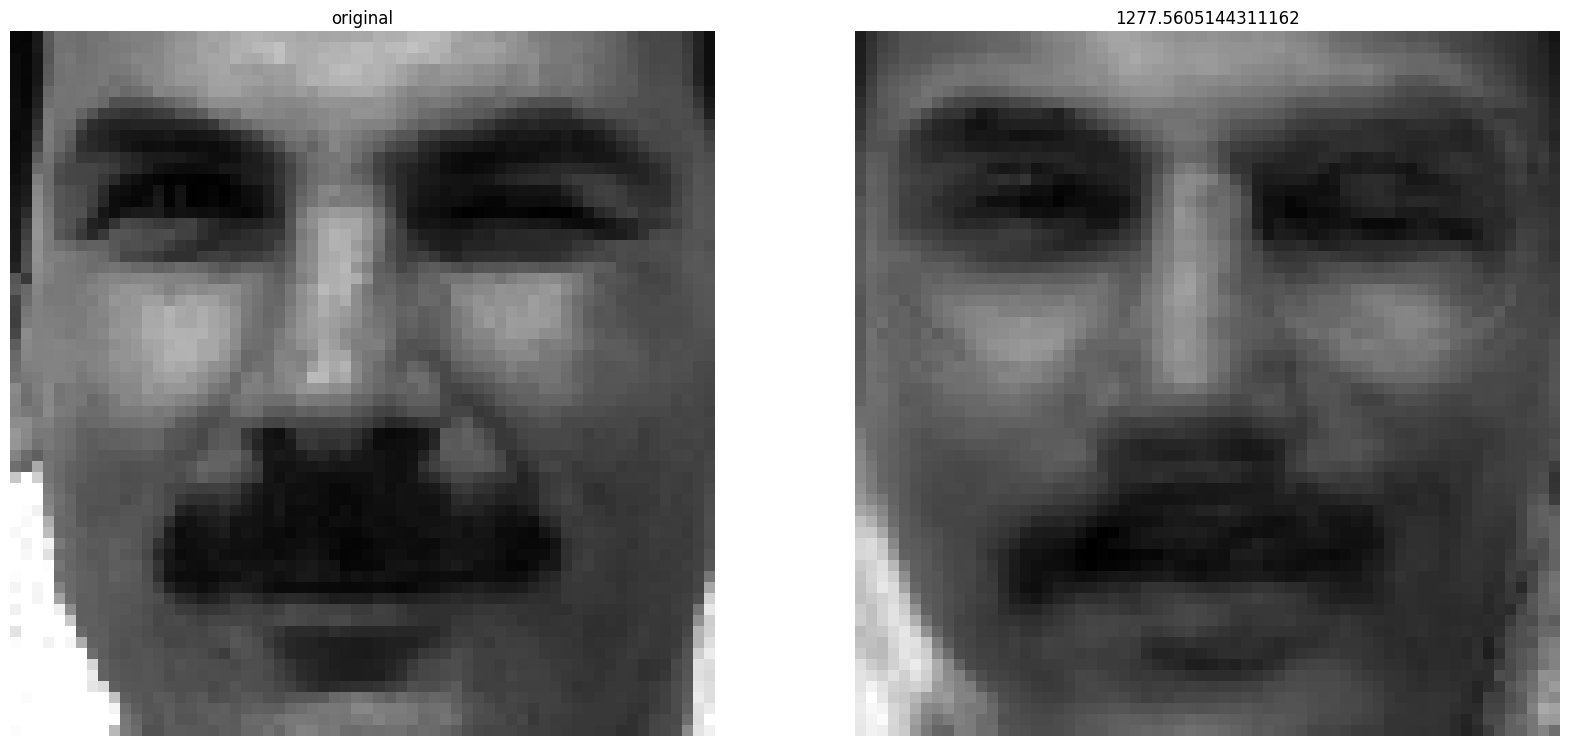

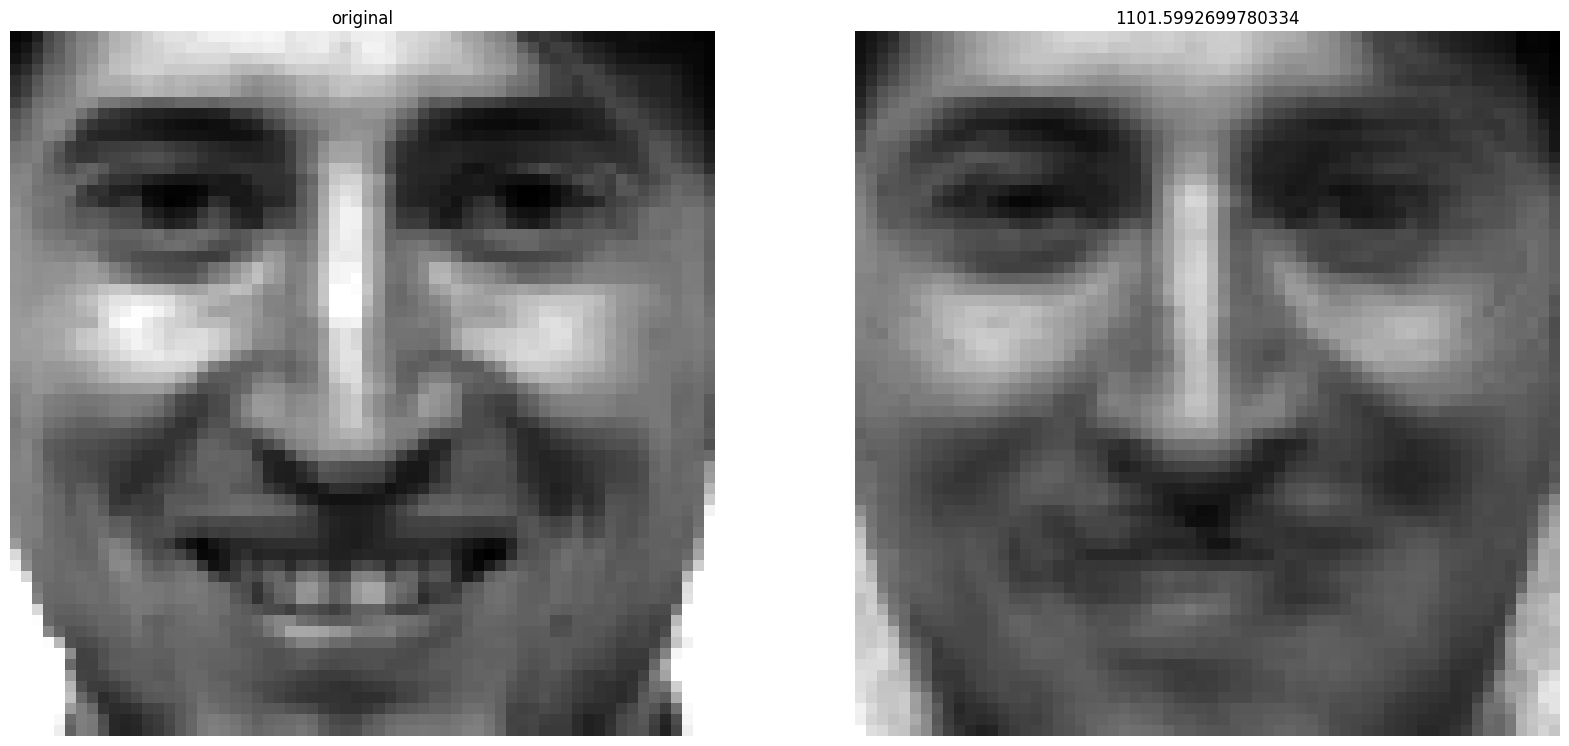

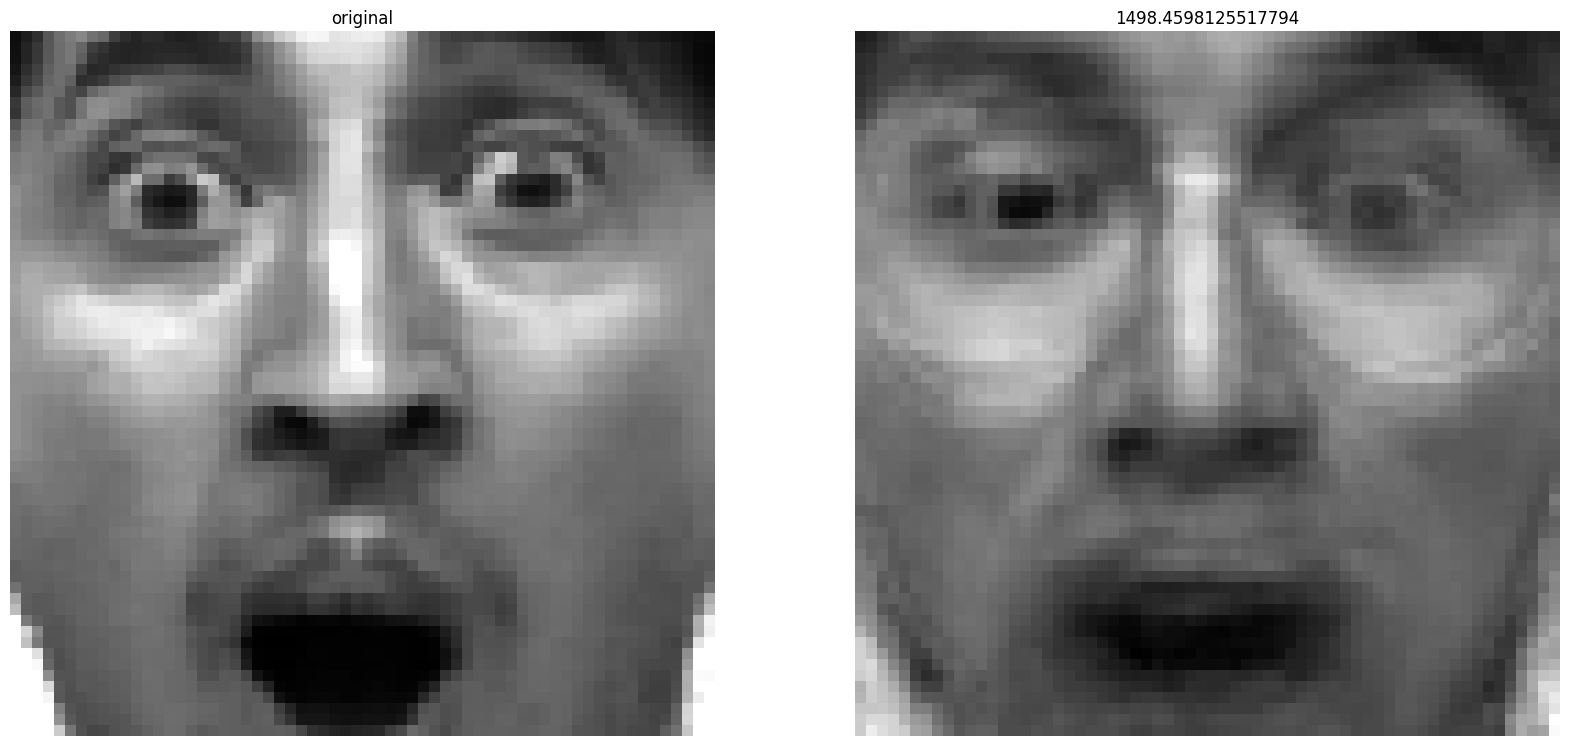

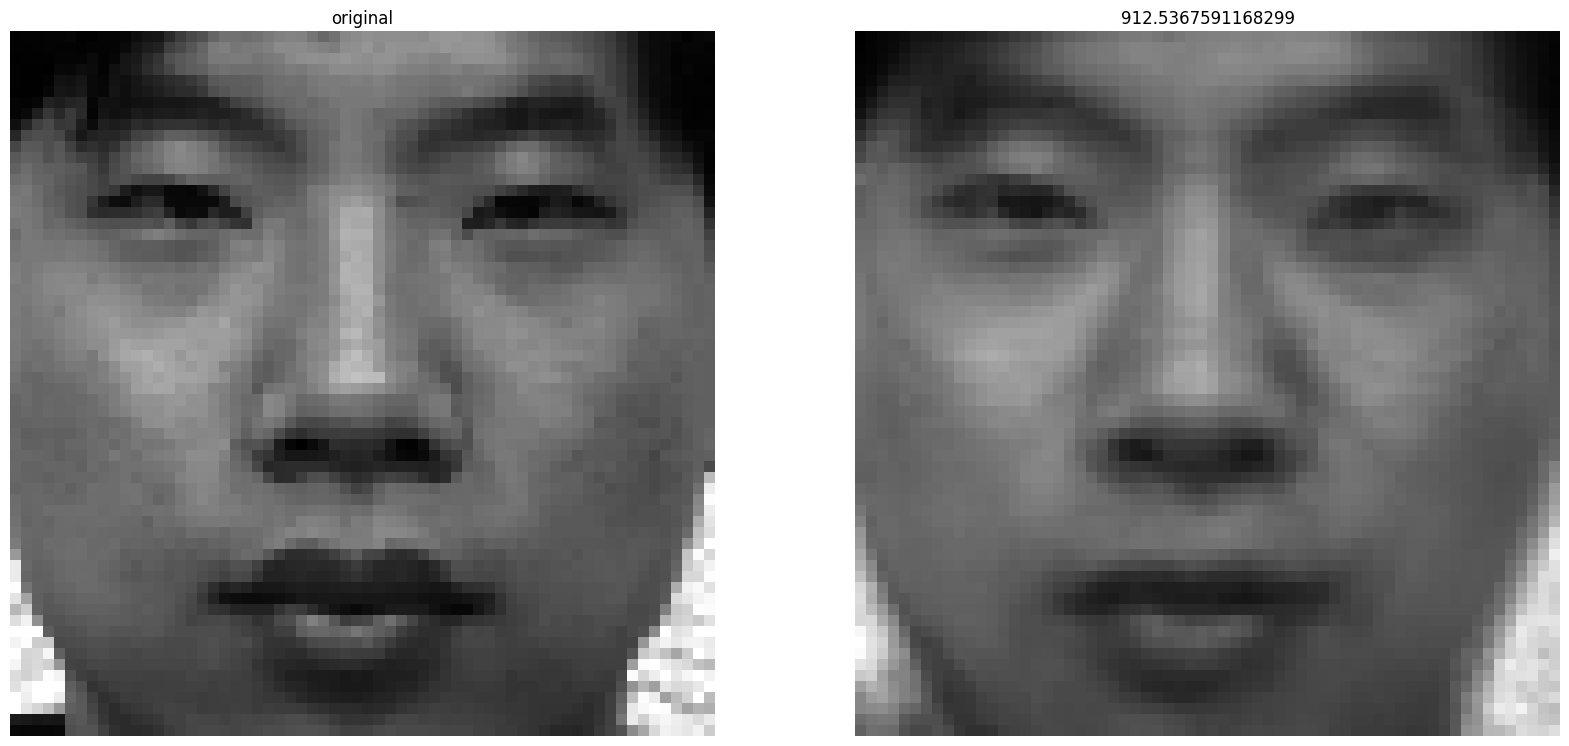

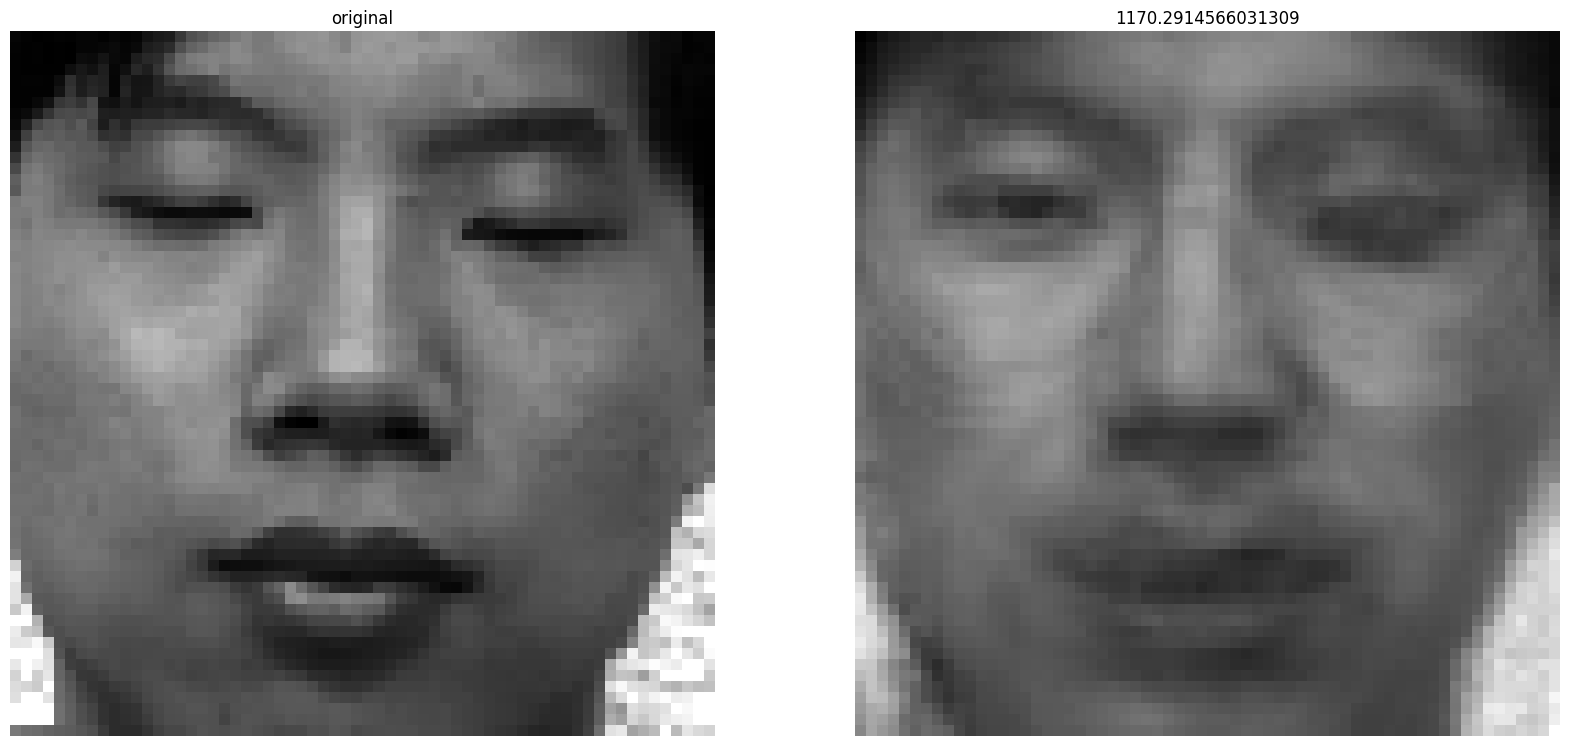

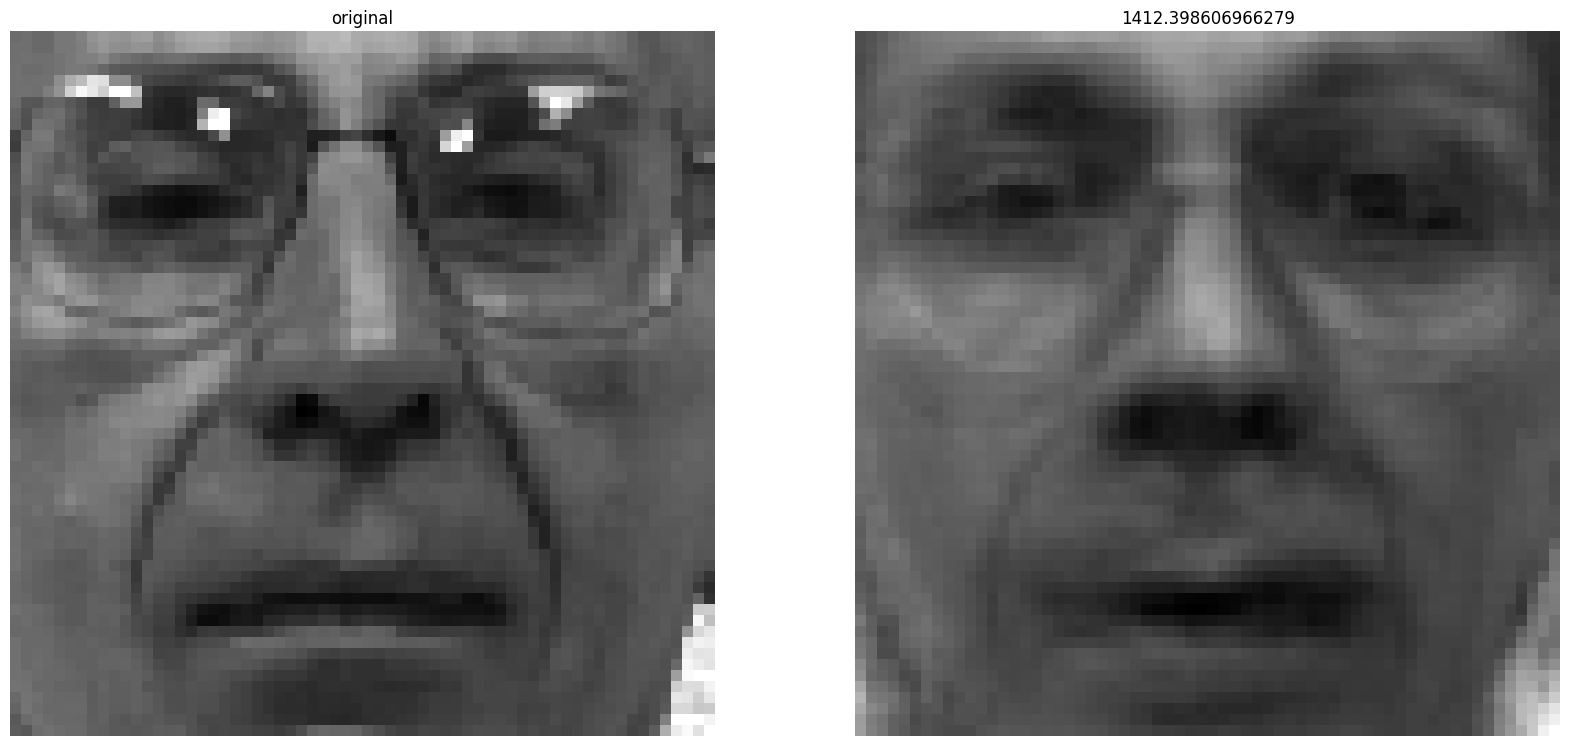

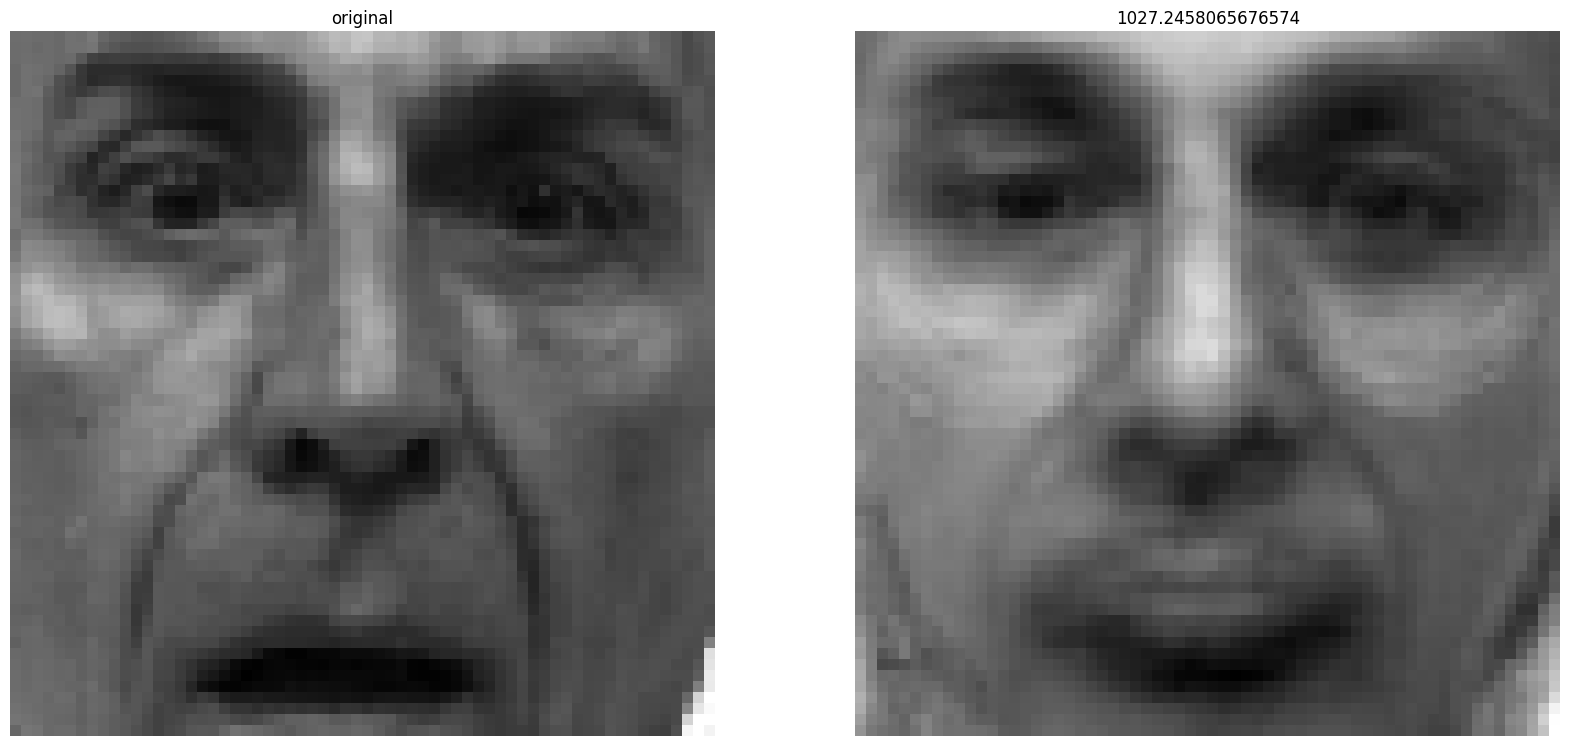

In [ ]:
# displays the original and reconstructed versions of the first 10
# test faces with K=30 eigenfaces

for i in range(10):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))

    x = X_test[:,i]
    ax[0].imshow(deflat(x), cmap="gray")
    ax[0].set_title("original")
    ax[0].axis("off")
    
    z = projEigenface(x, x_mean, U, 30)
    x_r = reconstruct(z, x_mean, U, 30)
    err = errorReconstruct(x_r, x)
    ax[1].imshow(deflat(x_r), cmap="gray")
    ax[1].set_title(f"{err}")
    ax[1].axis("off")

    plt.show()


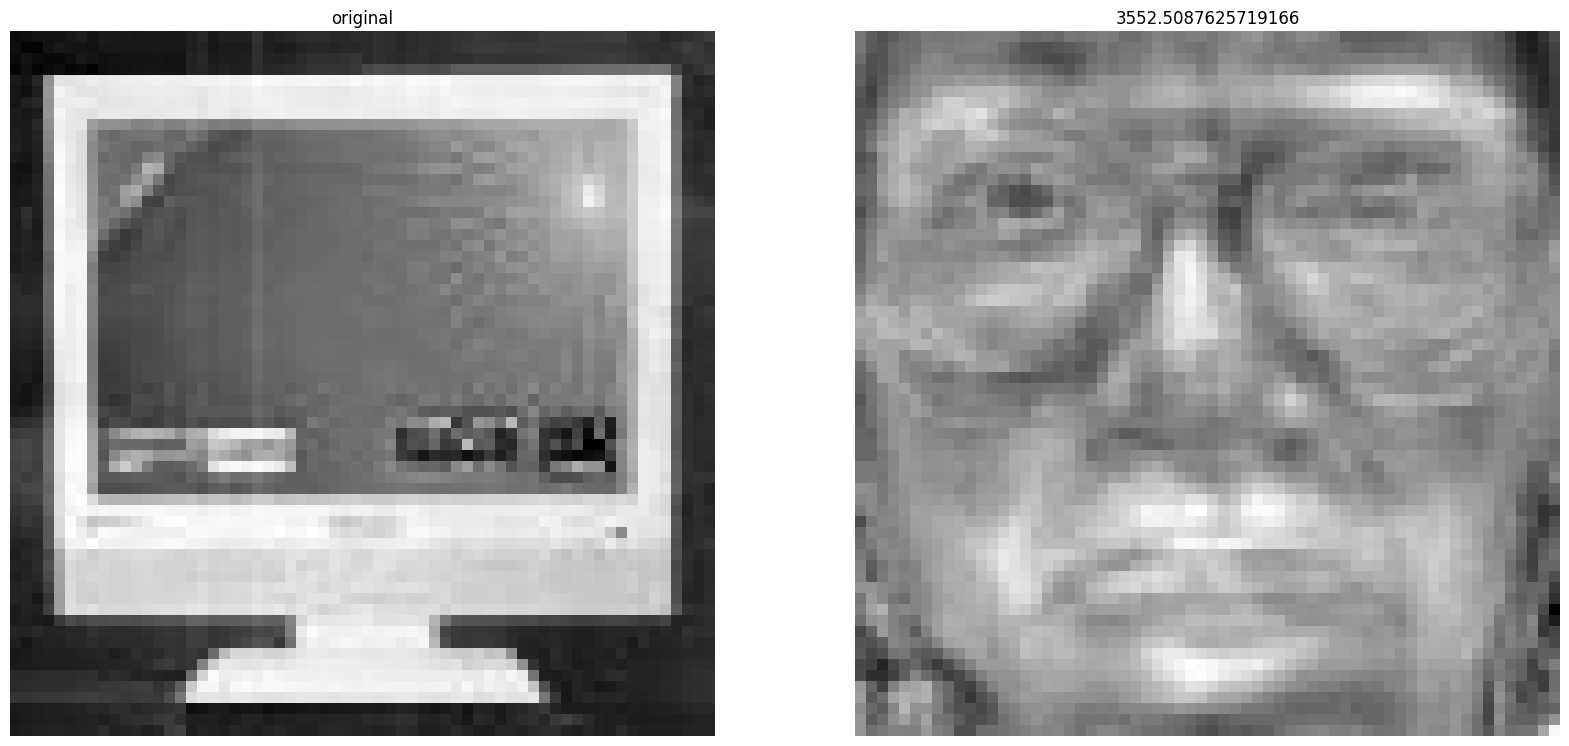

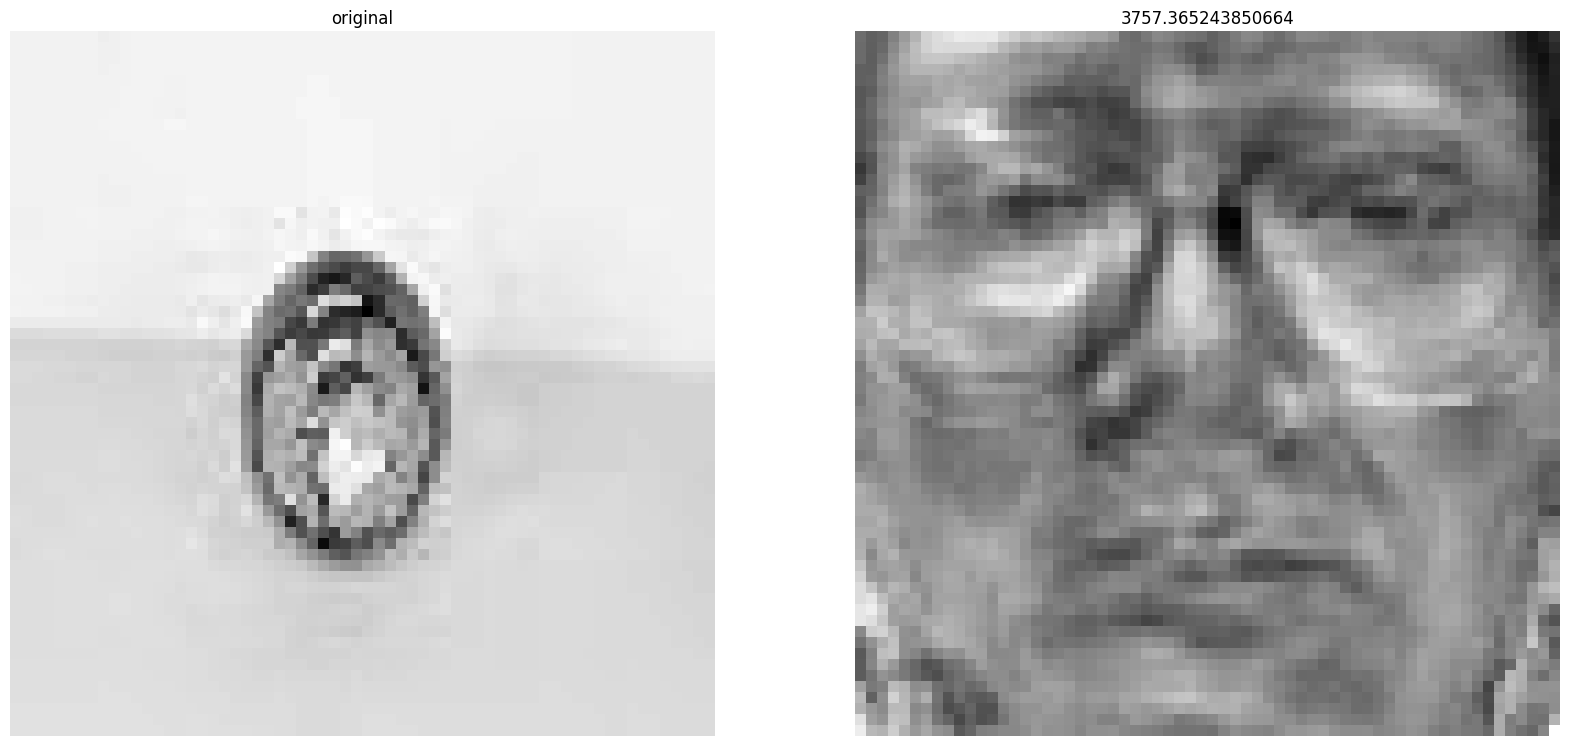

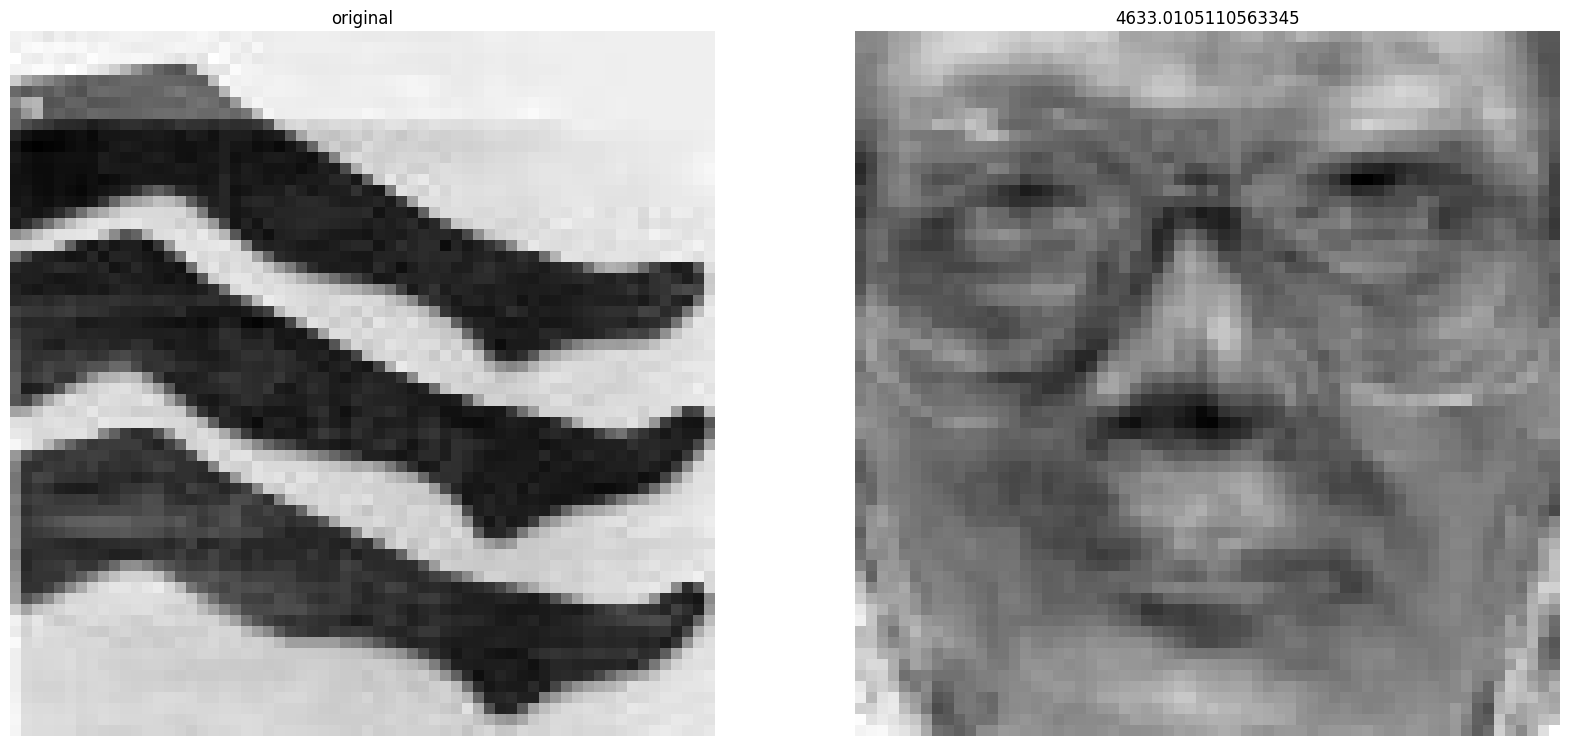

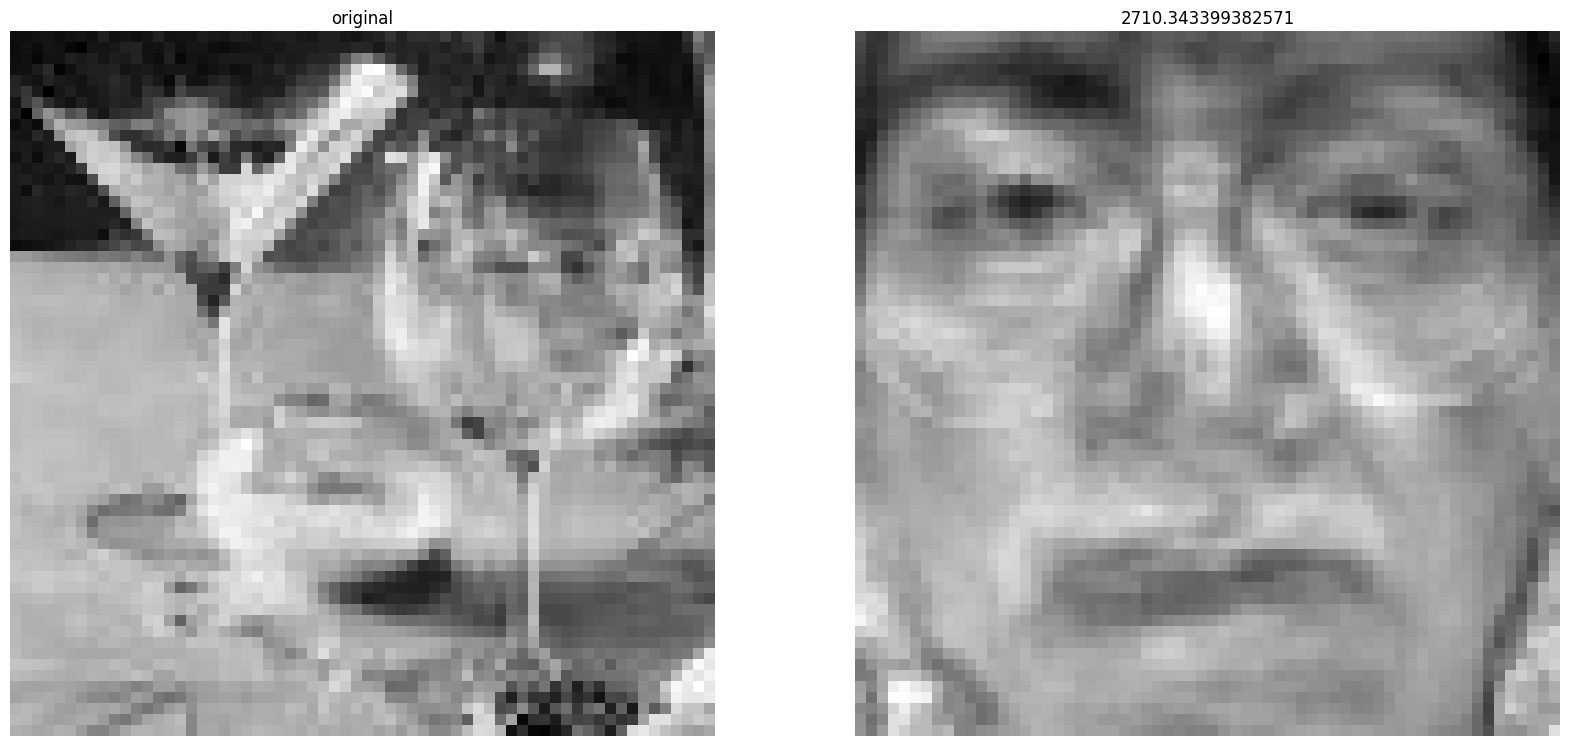

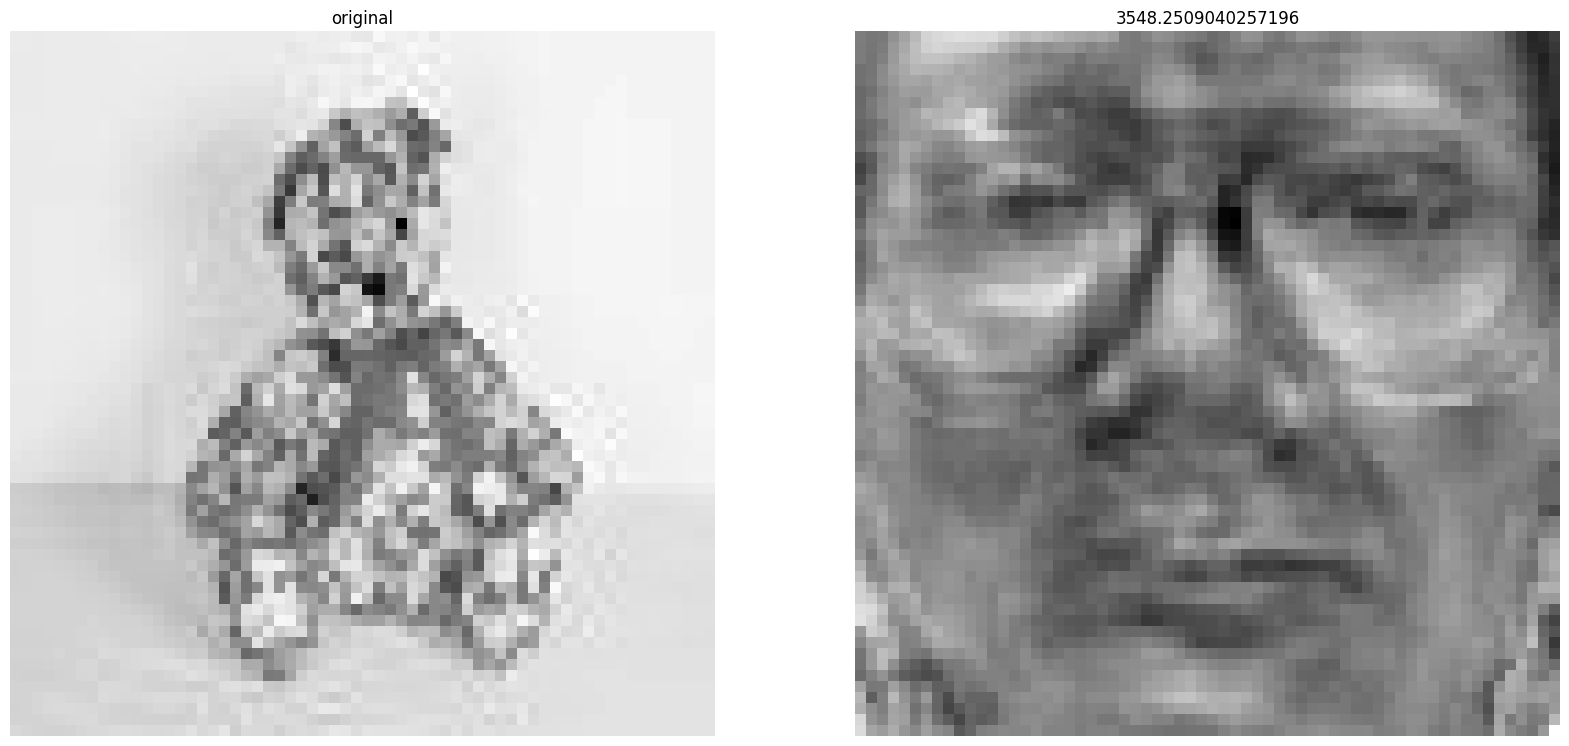

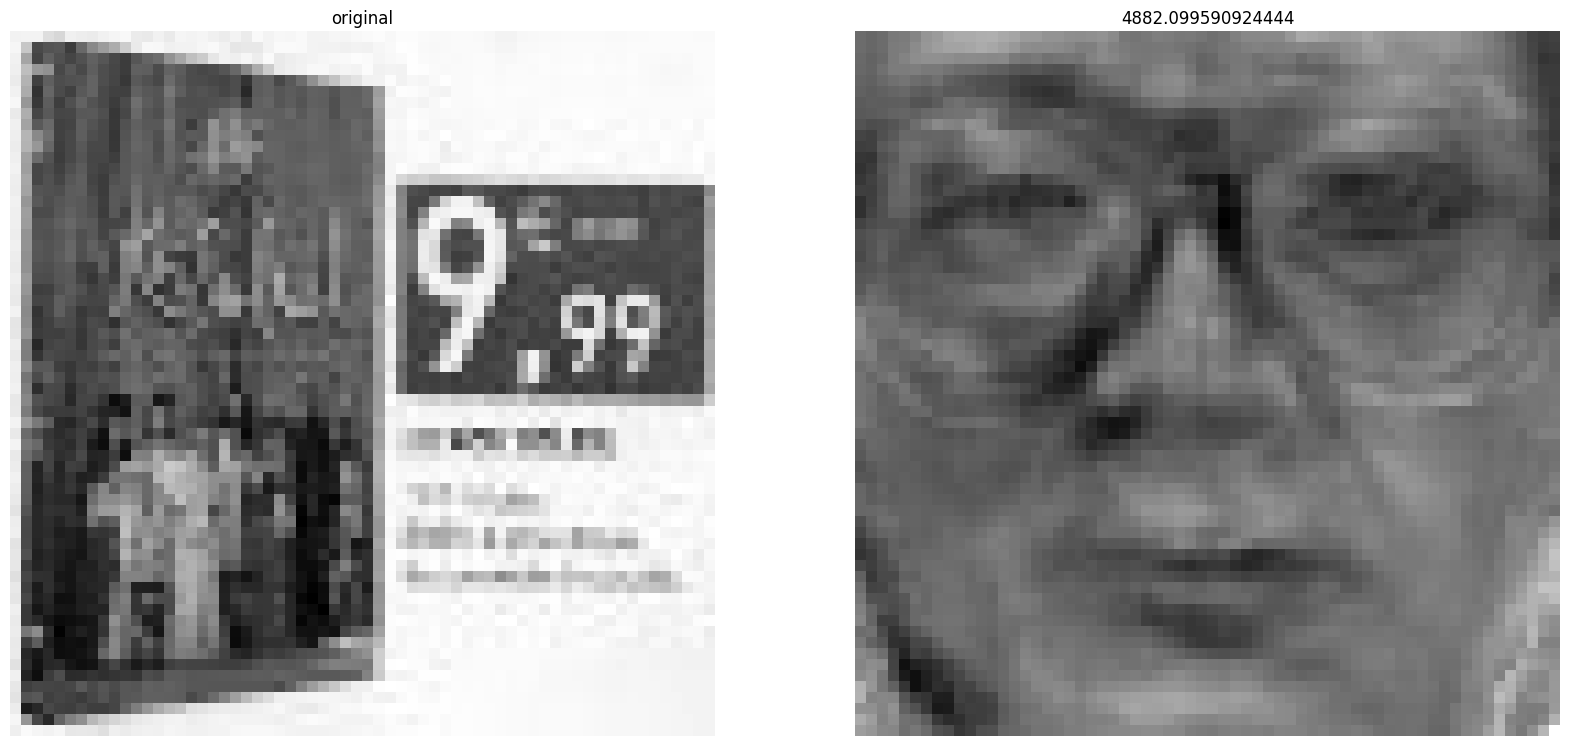

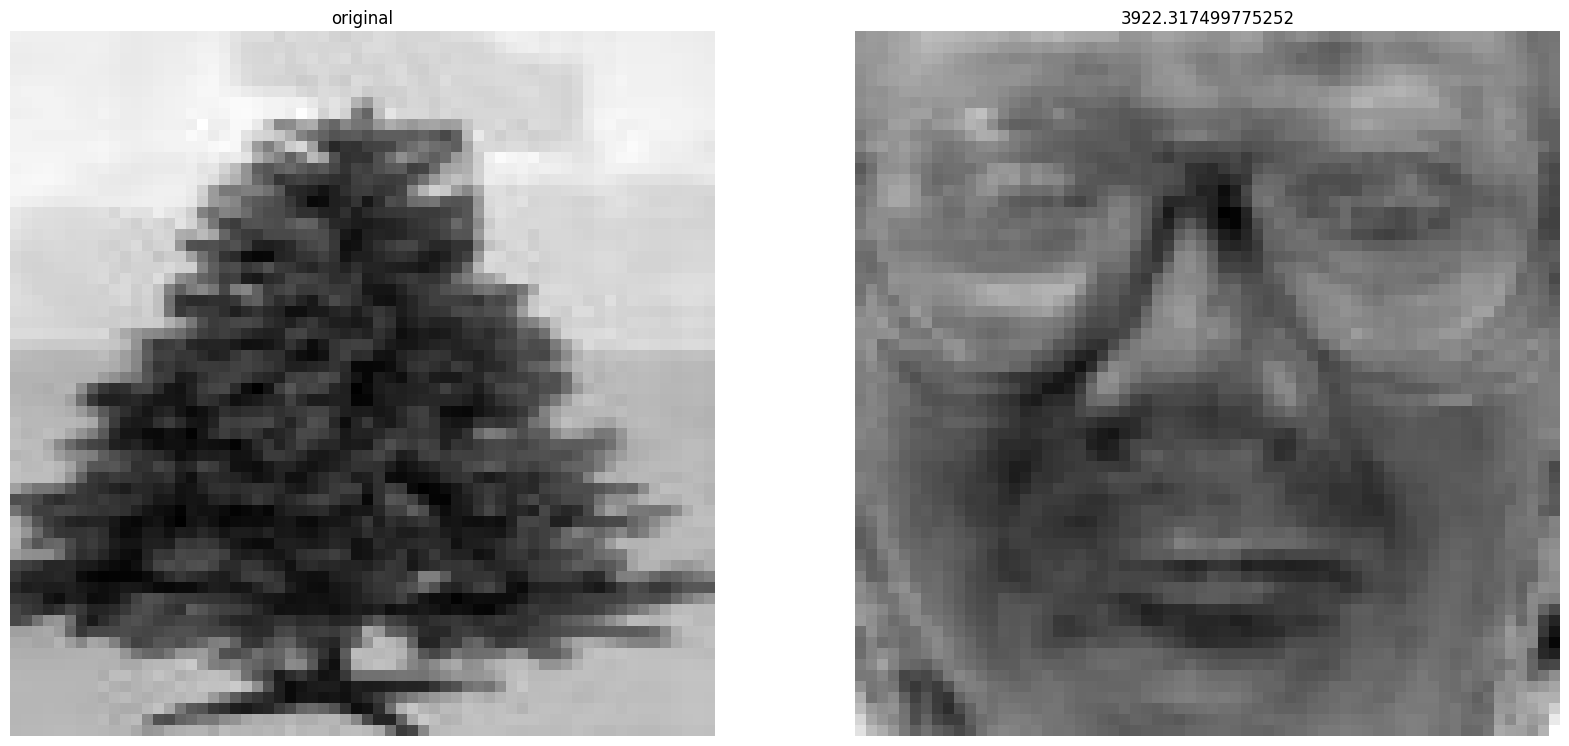

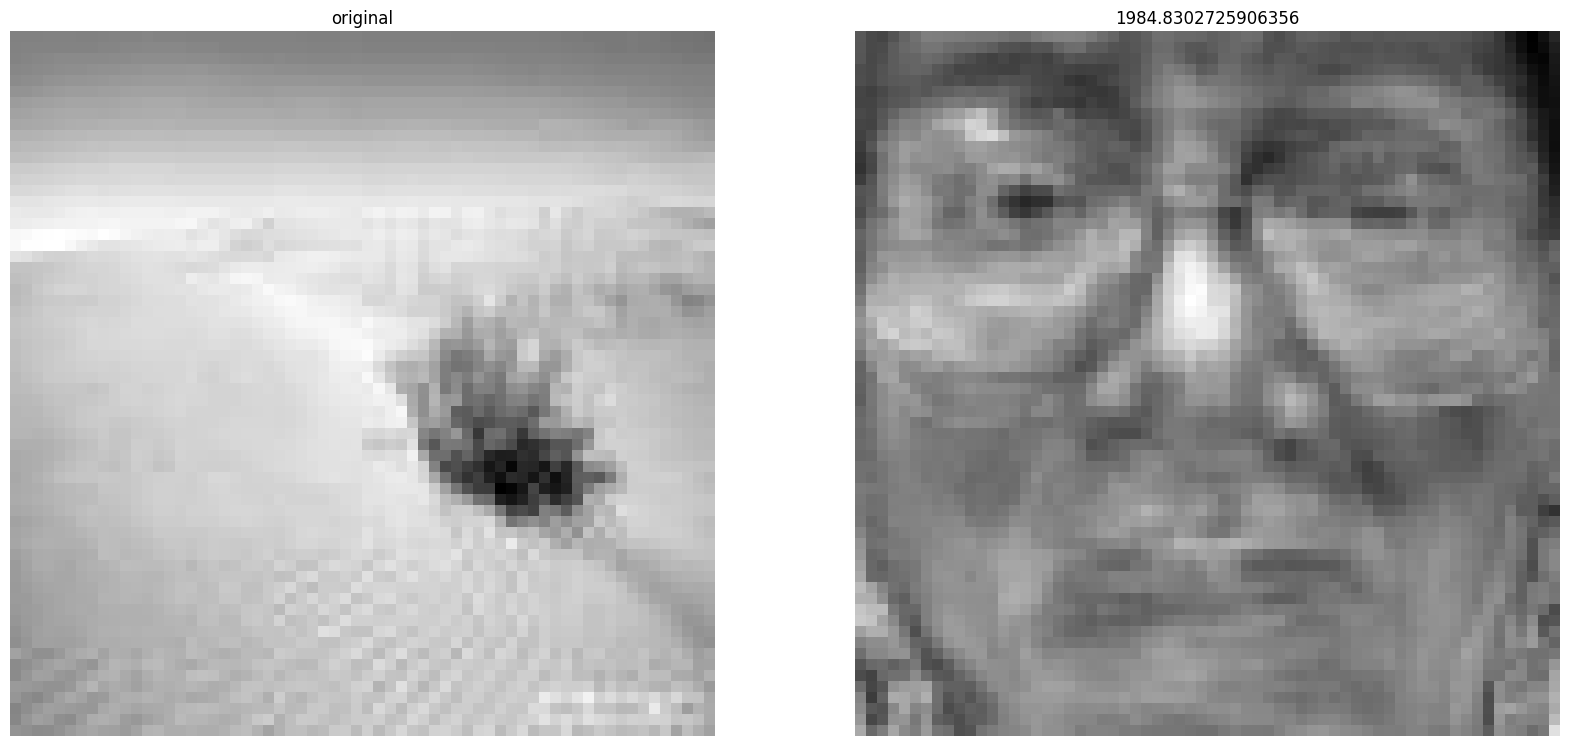

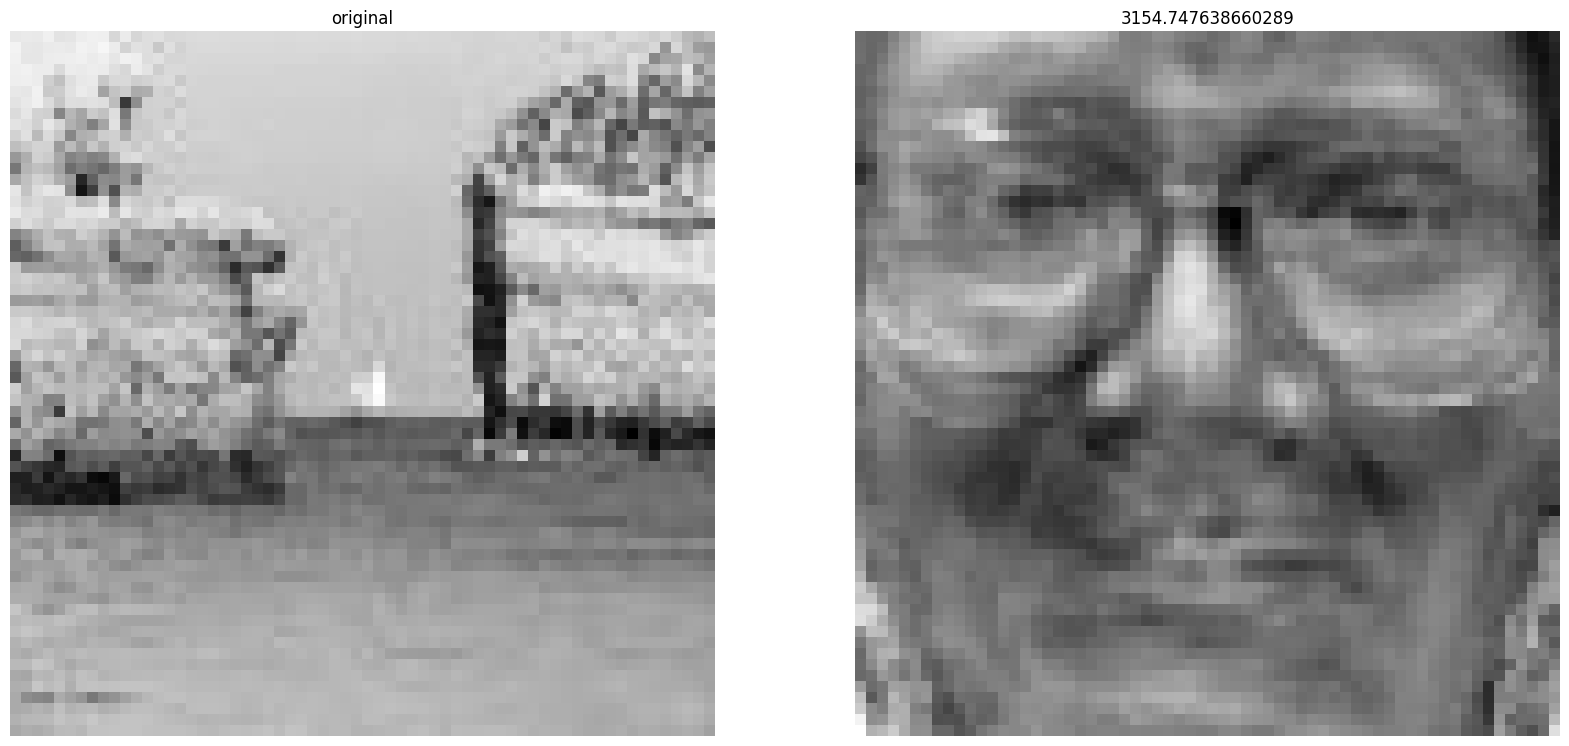

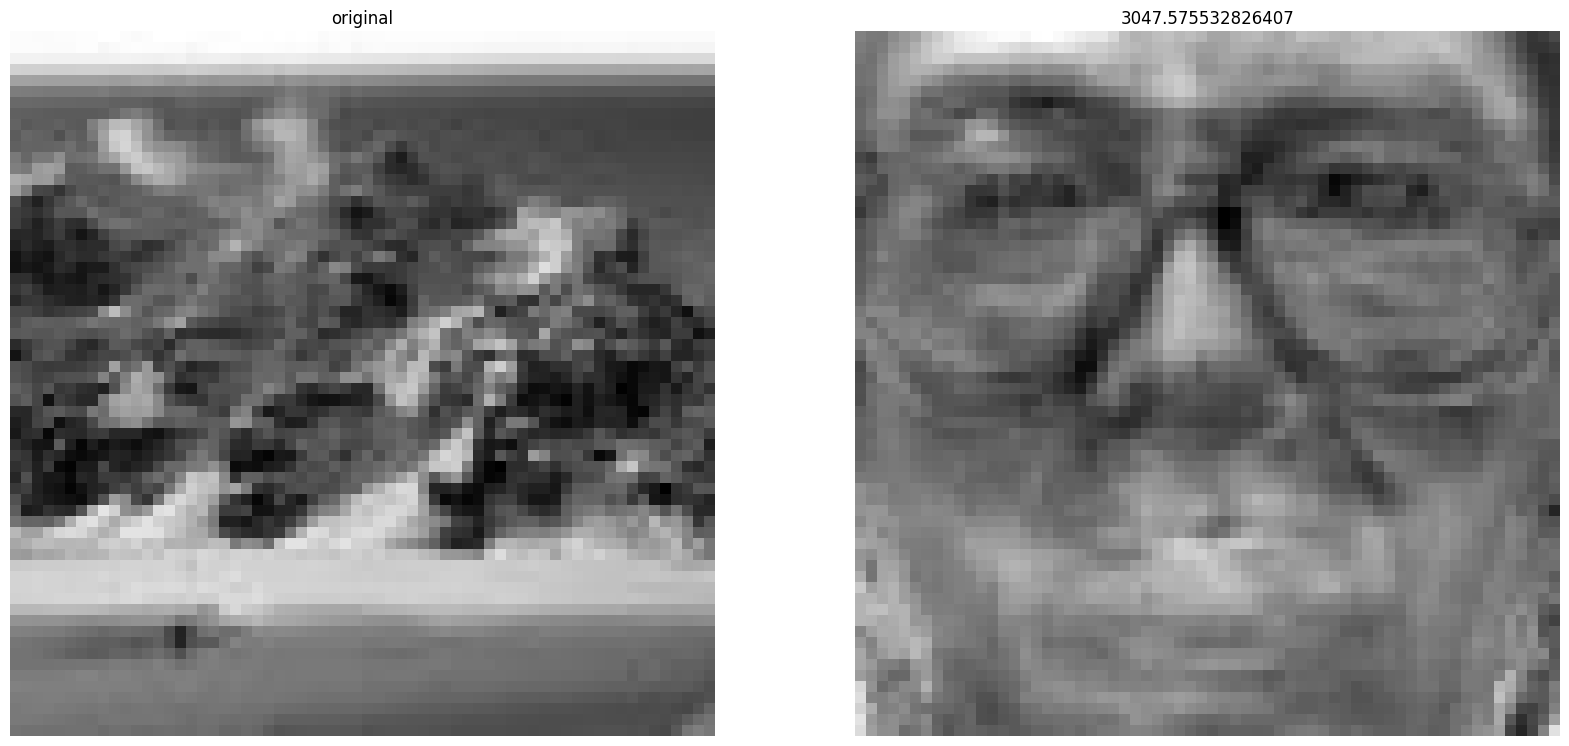

In [36]:
# displays the original and reconstructed versions of the first 10
# noface dataset with K=30 eigenfaces

for i in range(10):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))

    x = X_noface[:,i]
    ax[0].imshow(deflat(x), cmap="gray")
    ax[0].set_title("original")
    ax[0].axis("off")
    
    z = projEigenface(x, x_mean, U, 30)
    x_r = reconstruct(z, x_mean, U, 30)
    err = errorReconstruct(x_r, x)
    ax[1].imshow(deflat(x_r), cmap="gray")
    ax[1].set_title(f"{err}")
    ax[1].axis("off")

    plt.show()

It is clear that eigenfaces are not effective for non-face images. Test faces and their reconstructed versions show some resemblance, even if the results are not perfect. However, the reconstructions of non-face images are quite unsettling. Forcing recognition when an image is too far from the appropriate subspace leads to unreliable results.